<a href="https://colab.research.google.com/github/Ankuraxz/CanisData/blob/master/Dataprocessing_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/stevenpeutz/misinformation-fake-news-text-dataset-79k/code?resource=download

In [13]:
!ls

sample_data


# Final Version


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Canis/data_feature.csv', encoding='utf-8')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78588 entries, 0 to 78587
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   text                                  78588 non-null  object 
 1   label                                 78588 non-null  int64  
 2   text_without_stopwords                78588 non-null  object 
 3   vader_score                           78588 non-null  float64
 4   sentiment                             78588 non-null  int64  
 5   cluster                               78588 non-null  int64  
 6   no_of_sentences_original_news         78588 non-null  int64  
 7   avg_word_count_sentencewise_original  78588 non-null  float64
 8   word_count_nostopwords                78588 non-null  int64  
 9   pos_counts                            78588 non-null  object 
 10  dependency_parsing                    78588 non-null  object 
 11  fk_grade_level 

In [6]:
df.head(10)

text  label  \
0  The head of a conservative Republican faction ...      0   
1  Transgender people will be allowed for the fir...      0   
2  The special counsel investigation of links bet...      0   
3  Trump campaign adviser George Papadopoulos tol...      0   
4  President Donald Trump called on the U.S. Post...      0   
5  The White House said on Friday it was set to k...      0   
6  President Donald Trump said on Thursday he bel...      0   
7  While the Fake News loves to talk about my so-...      0   
8  Together, we are MAKING AMERICA GREAT AGAIN! b...      0   
9  Alabama Secretary of State John Merrill said h...      0   

                              text_without_stopwords  vader_score  sentiment  \
0  head conservative Republican faction U.S. Cong...       0.9857          1   
1  Transgender people allowed first time enlist U...       0.9488          1   
2  special counsel investigation links Russia Pre...      -0.6808          0   
3  Trump campaign adviser George Papadopoulos tol...      -0.2201          0   
4  President Donald Trump called U.S. Postal Serv...       0.5896          1   
5  White House said Friday set kick talks next we...       0.6369          1   
6  President Donald Trump said Thursday believes ...       0.9814          1   
7  Fake News loves talk so-called low approval ra...       0.5845          1   
8  Together, MAKING AMERICA GREAT AGAIN! bit.ly/2...       0.7290          1   
9  Alabama Secretary State John Merrill said cert...       0.4767          1   

   cluster  no_of_sentences_original_news  \
0        1                             30   
1        0                             13   
2        1                             17   
3        1                             16   
4        0                             40   
5        1                              4   
6        1                             26   
7        0                              2   
8        0                              2   
9        0                              2   

   avg_word_count_sentencewise_original  word_count_nostopwords  
0                             29.333333                     880  
1                             34.615385                     450  
2                             30.470588                     518  
3                             27.000000                     432  
4                             24.550000                     982  
5                             31.500000                     126  
6                             23.846154                     620  
7                             30.000000                      60  
8                              7.000000                      14  
9                             35.500000                      71

In [10]:
df.columns

Index(['text', 'label', 'text_without_stopwords', 'vader_score', 'sentiment',
       'cluster', 'no_of_sentences_original_news',
       'avg_word_count_sentencewise_original', 'word_count_nostopwords'],
      dtype='object')

In [9]:
# Clean and preprocess the text data
import re
df['text_without_stopwords'] = df['text_without_stopwords'].apply(lambda x: re.sub(r'[^\w\s]|(\b\w{1,3}\b)', '', str(x))) # remove symbols and short words

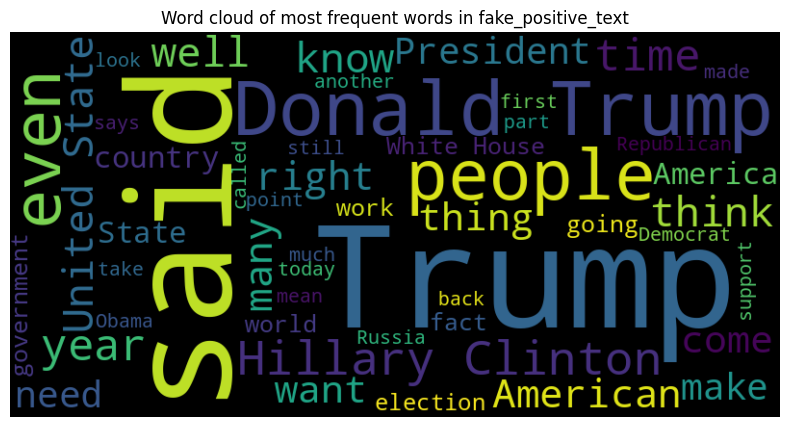

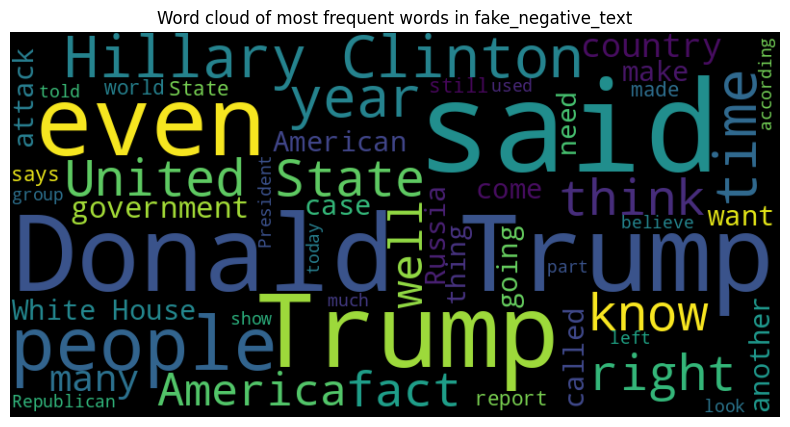

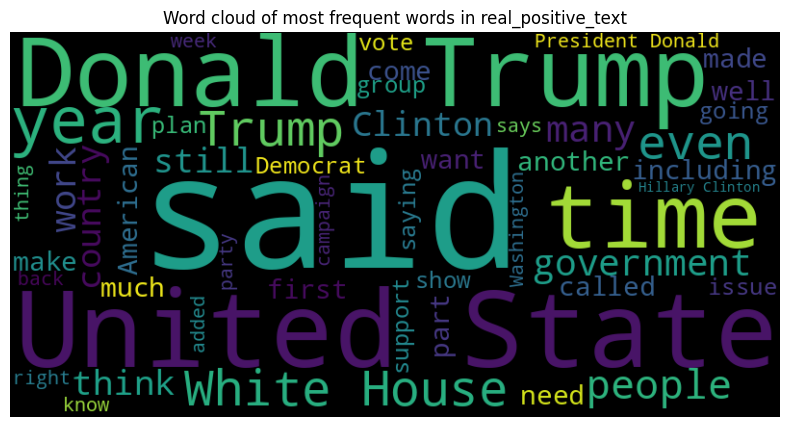

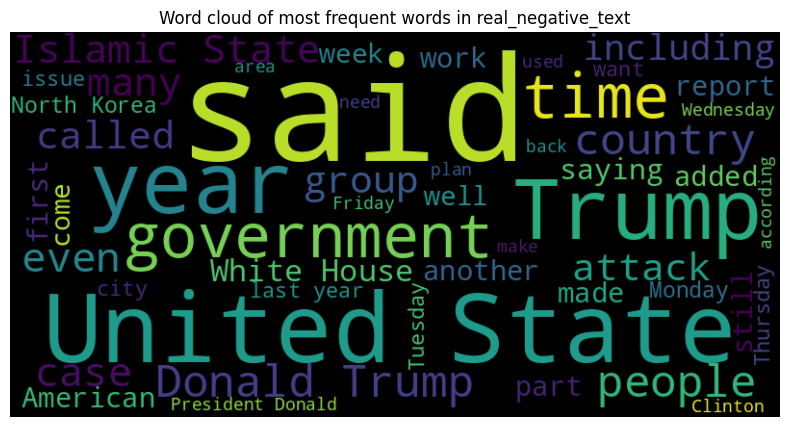

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fake_positive_text = df[(df['label'] == 1) & (df['sentiment'] == 1)]['text_without_stopwords'].str.cat(sep=' ')
fake_negative_text = df[(df['label'] == 1) & (df['sentiment'] == 0)]['text_without_stopwords'].str.cat(sep=' ')
real_positive_text = df[(df['label'] == 0) & (df['sentiment'] == 1)]['text_without_stopwords'].str.cat(sep=' ')
real_negative_text = df[(df['label'] == 0) & (df['sentiment'] == 0)]['text_without_stopwords'].str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, max_words=50).generate(fake_positive_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud of most frequent words in fake_positive_text')
plt.show()

wordcloud = WordCloud(width=800, height=400, max_words=50).generate(fake_negative_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud of most frequent words in fake_negative_text')
plt.show()


wordcloud = WordCloud(width=800, height=400, max_words=50).generate(real_positive_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud of most frequent words in real_positive_text')
plt.show()

wordcloud = WordCloud(width=800, height=400, max_words=50).generate(real_negative_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud of most frequent words in real_negative_text')
plt.show()

In [16]:
import nltk
import ssl
from nltk import FreqDist
import nltk
import matplotlib.pyplot as plt

# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context

# nltk.download()
# Download stopwords and lemmatizer if needed
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

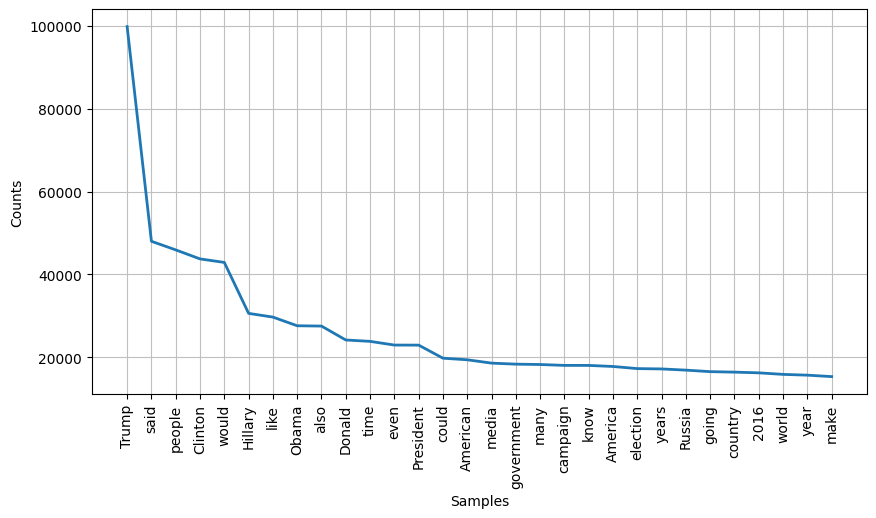

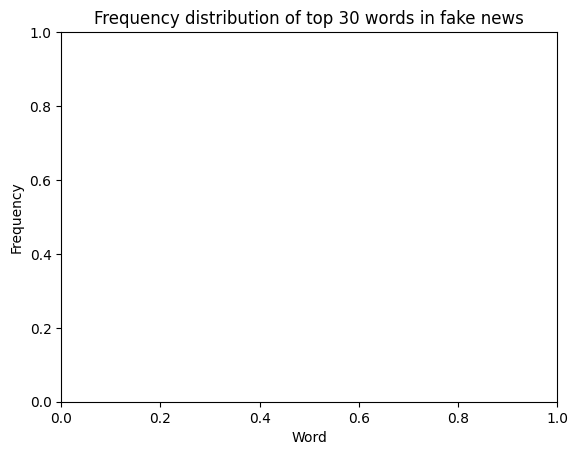

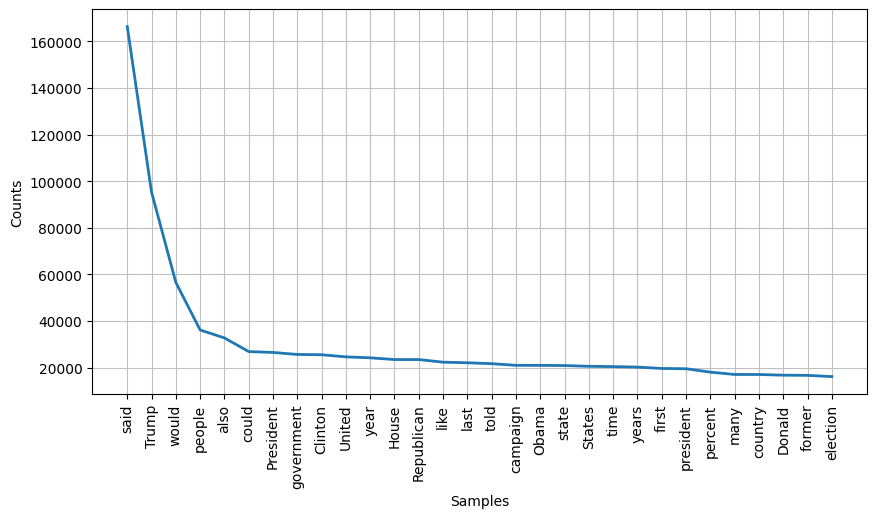

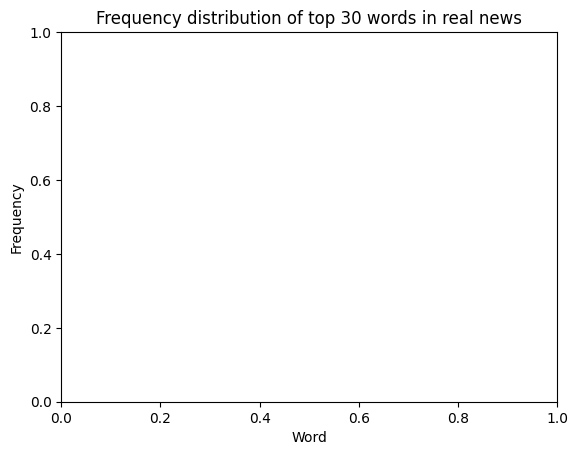

In [17]:
fake_text = df[df['label'] ==1 ]['text_without_stopwords'].str.cat(sep=' ')
real_text = df[df['label'] == 0]['text_without_stopwords'].str.cat(sep=' ')

fake_words = nltk.word_tokenize(fake_text)
real_words = nltk.word_tokenize(real_text)

fake_freq_dist = FreqDist(fake_words)
real_freq_dist = FreqDist(real_words)

plt.figure(figsize=(10,5))
fake_freq_dist.plot(30, cumulative=False)
plt.title('Frequency distribution of top 30 words in fake news')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,5))
real_freq_dist.plot(30, cumulative=False)
plt.title('Frequency distribution of top 30 words in real news')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

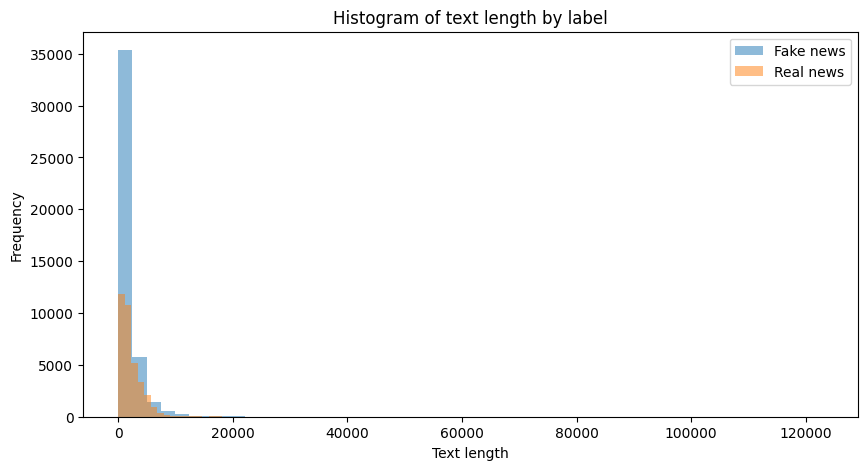

In [18]:
fake_lengths = df[df['label'] == 1]['text_without_stopwords'].apply(lambda x: len(x))
real_lengths = df[df['label'] == 0]['text_without_stopwords'].apply(lambda x: len(x))

plt.figure(figsize=(10,5))
plt.hist(fake_lengths, bins=50, alpha=0.5, label='Fake news')
plt.hist(real_lengths, bins=50, alpha=0.5, label='Real news')
plt.title('Histogram of text length by label')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

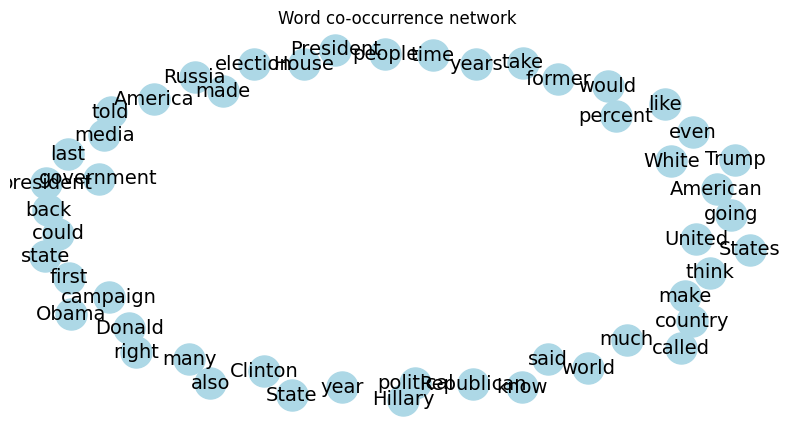

In [19]:
import networkx as nx

text = df['text_without_stopwords'].str.cat(sep=' ')
words = nltk.word_tokenize(text)
freq_dist = FreqDist(words)
top_words = [word[0] for word in freq_dist.most_common(50)]
word_pairs = [(top_words[i], top_words[j]) for i in range(len(top_words)) for j in range(i+1, len(top_words)) if i != j]
word_cooccur = FreqDist(word_pairs)
G = nx.Graph()
for word in top_words:
    G.add_node(word)
for pair, freq in word_cooccur.items():
    if freq > 5:
        G.add_edge(pair[0], pair[1], weight=freq)

plt.figure(figsize=(10,5))
pos = nx.spring_layout(G, k=2)
nx.draw_networkx(G, pos, node_size=500, node_color='lightblue', edge_color='gray', font_size=14, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Word co-occurrence network')
plt.axis('off')
plt.show()

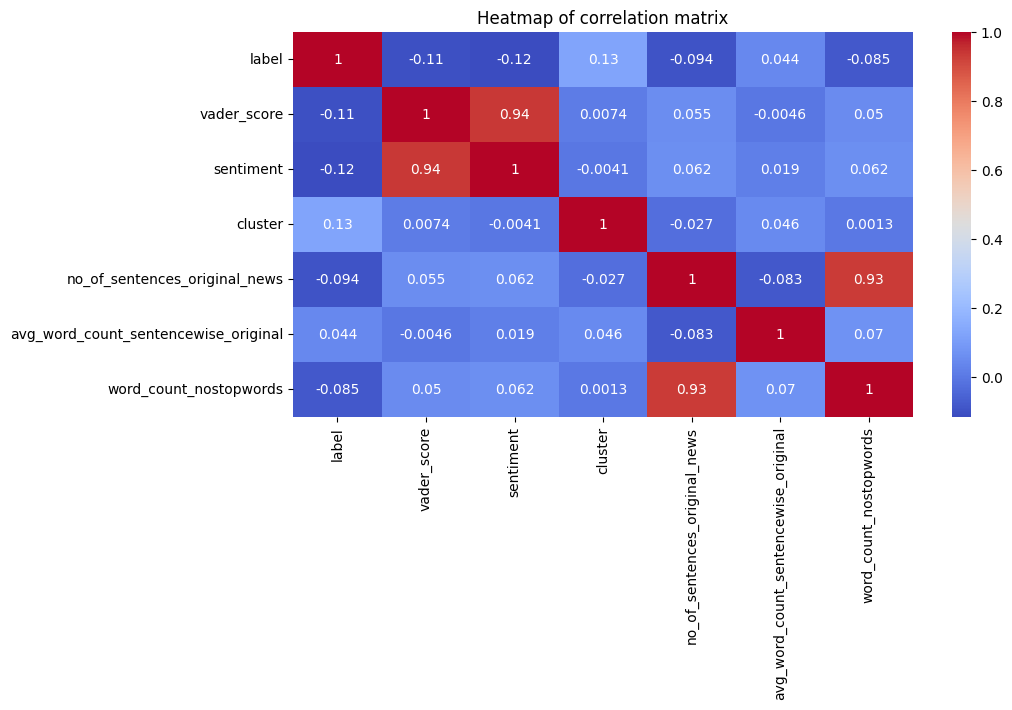

In [20]:
import seaborn as sns

corr_matrix = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of correlation matrix')
plt.show()

In [22]:
# !pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 26.6 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


In [23]:
import pandas as pd
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora, models
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt


def preprocess_text(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

#Preprocess text
preprocessed_text = [preprocess_text(text) for text in df['text_without_stopwords']]

# Create dictionary and corpus
dictionary = corpora.Dictionary(preprocessed_text)
corpus = [dictionary.doc2bow(text) for text in preprocessed_text]

num_topics = 3 #Should be number of Clusters
lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, alpha='auto')


In [24]:
# Print topics and top words
for topic_id in range(num_topics):
    print(f"Topic {topic_id}: {lda_model.print_topic(topic_id)}\n")

# Visualize topics
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 0: 0.005*"people" + 0.004*"government" + 0.004*"world" + 0.003*"said" + 0.003*"years" + 0.003*"like" + 0.003*"money" + 0.003*"time" + 0.003*"year" + 0.003*"health"

Topic 1: 0.014*"trump" + 0.010*"clinton" + 0.007*"hillary" + 0.006*"people" + 0.006*"said" + 0.005*"president" + 0.005*"election" + 0.004*"like" + 0.004*"media" + 0.004*"campaign"

Topic 2: 0.012*"russia" + 0.008*"russian" + 0.007*"military" + 0.006*"ukraine" + 0.006*"syria" + 0.005*"said" + 0.005*"government" + 0.004*"united" + 0.004*"states" + 0.004*"world"



/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [25]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# assuming you have already created a gensim LDA model and corpus
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)

# save the graph as an HTML file
pyLDAvis.save_html(vis_data, 'lda_graph.html')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [26]:
# Save the model
lda_model.save('my_lda_model')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
lda_model.print_topics()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.005*"people" + 0.004*"government" + 0.004*"world" + 0.003*"said" + 0.003*"years" + 0.003*"like" + 0.003*"money" + 0.003*"time" + 0.003*"year" + 0.003*"health"'),
 (1,
  '0.014*"trump" + 0.010*"clinton" + 0.007*"hillary" + 0.006*"people" + 0.006*"said" + 0.005*"president" + 0.005*"election" + 0.004*"like" + 0.004*"media" + 0.004*"campaign"'),
 (2,
  '0.012*"russia" + 0.008*"russian" + 0.007*"military" + 0.006*"ukraine" + 0.006*"syria" + 0.005*"said" + 0.005*"government" + 0.004*"united" + 0.004*"states" + 0.004*"world"')]

# More Viz

In [ ]:
# !pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 6.4 MB/s eta 0:00:00m eta 0:00:010:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [28]:

from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate the TF-IDF vectorizer
vectorizer = TfidfVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x, min_df=5)

# Calculate the word occurrences based on TF-IDF scores
word_occurrence = vectorizer.fit_transform(df['text_without_stopwords'])
vocab = vectorizer.vocabulary_.keys()
word_occurrence = pd.DataFrame(word_occurrence.toarray(), columns=vocab)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [30]:



# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA
# import networkx as nx

# # Dimensionality reduction with PCA
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(word_occurrence.T)

# # Create a scatter plot of the text data
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['sentiment'], cmap='coolwarm')
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.title('PCA Scatter Plot')
# plt.show()

# # Create a network graph of word co-occurrences
# cooc = word_occurrence.T.dot(word_occurrence)
# G = nx.Graph()
# for i, node_i in enumerate(cooc.index):
#     for j, node_j in enumerate(cooc.columns):
#         if cooc.iloc[i,j] > 0:
#             G.add_edge(node_i, node_j, weight=cooc.iloc[i,j])
# nx.draw_kamada_kawai(G, node_size=100, node_color='lightblue', edge_color='gray', with_labels=True)
# plt.title('Word Co-occurrence Network Graph')
# plt.show()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


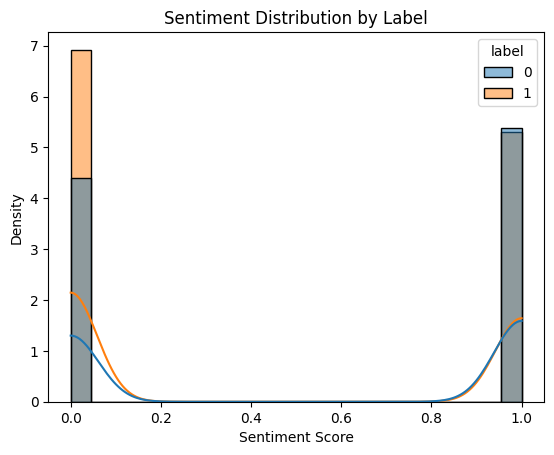

In [31]:
#Sentiment distribution: Similar to vader score, you can use a histogram to show the distribution of sentiment scores. You can also overlay the histogram with density plots for fake and real news

import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram with density plots
sns.histplot(data=df, x='sentiment', hue='label', stat="density", kde=True)

# Add title and labels
plt.title('Sentiment Distribution by Label')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')

# Show plot
plt.show()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


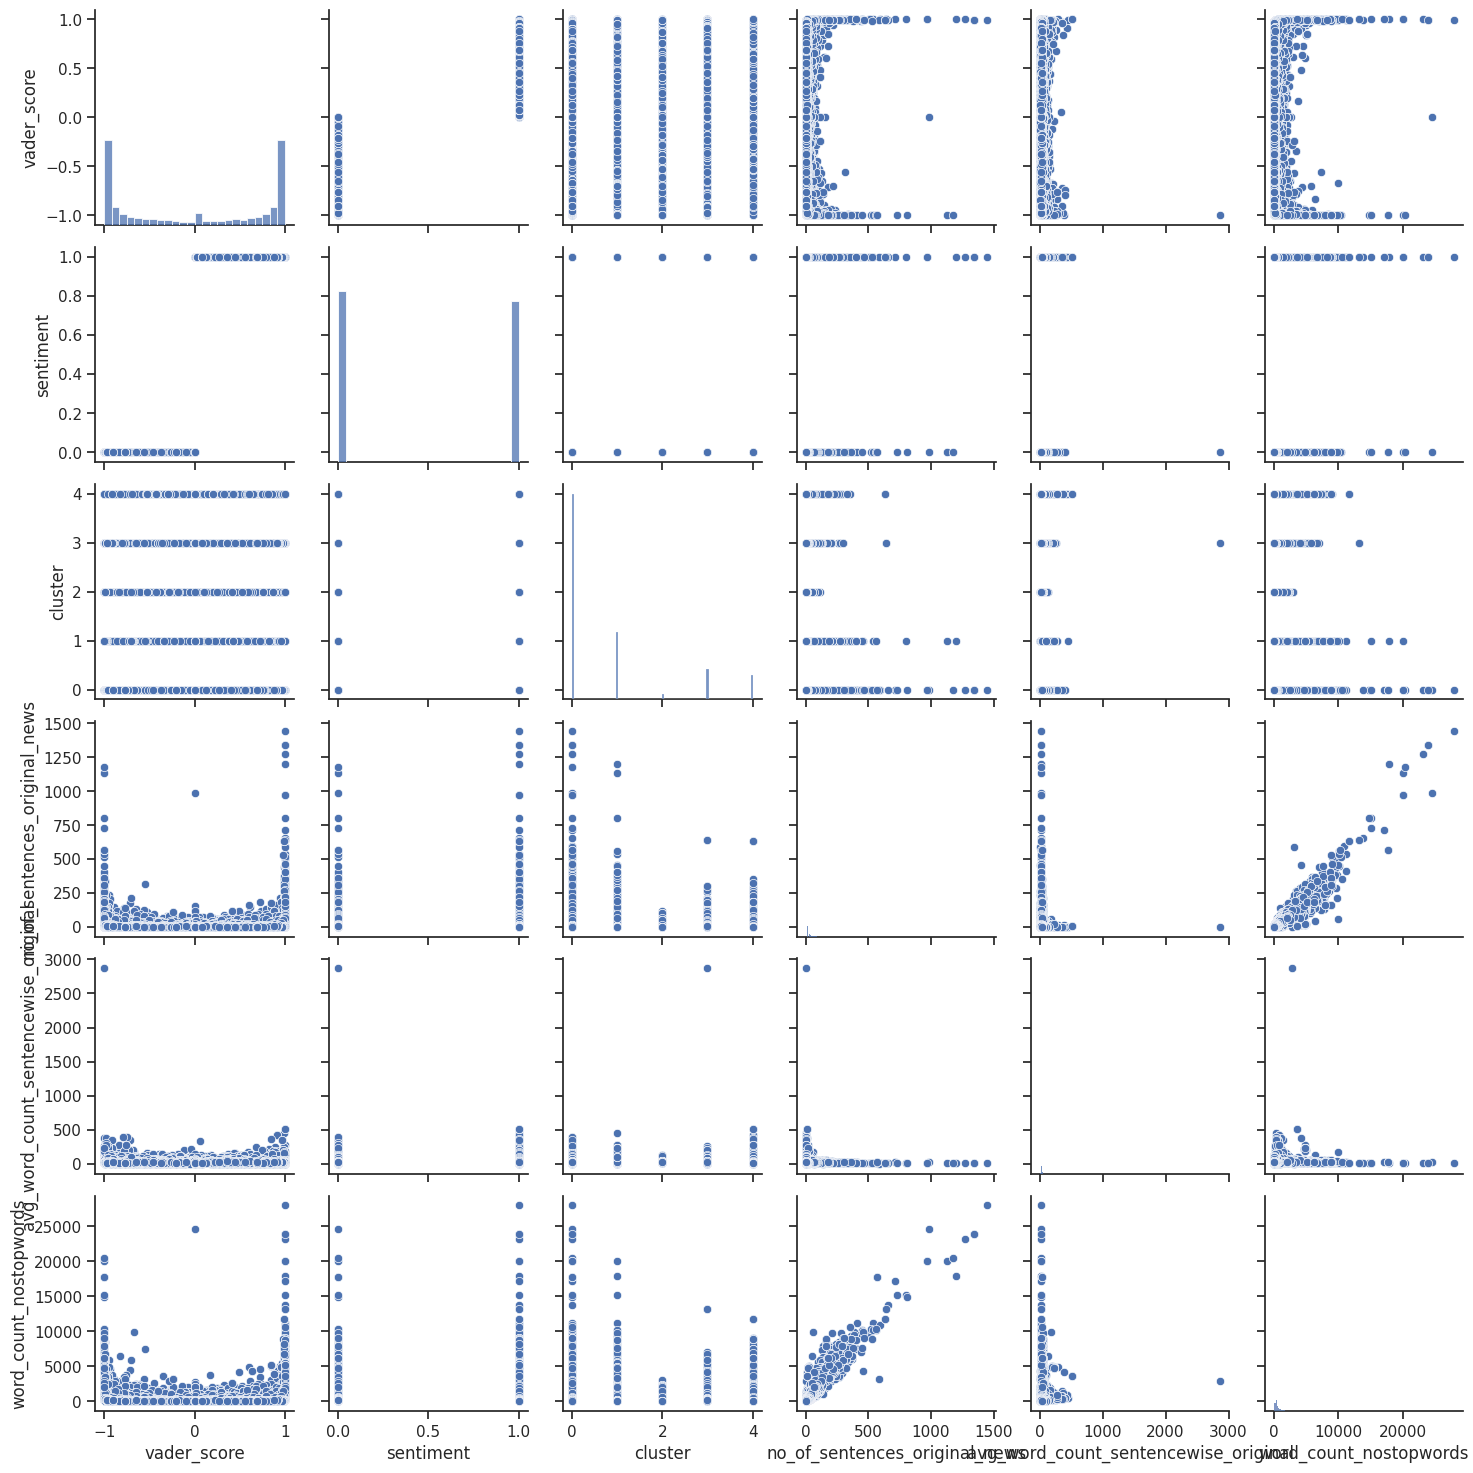

In [32]:
import seaborn as sns

sns.set(style="ticks")

cols = ['vader_score', 'sentiment', 'cluster', 'no_of_sentences_original_news', 'avg_word_count_sentencewise_original', 'word_count_nostopwords']

sns.pairplot(df[cols])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


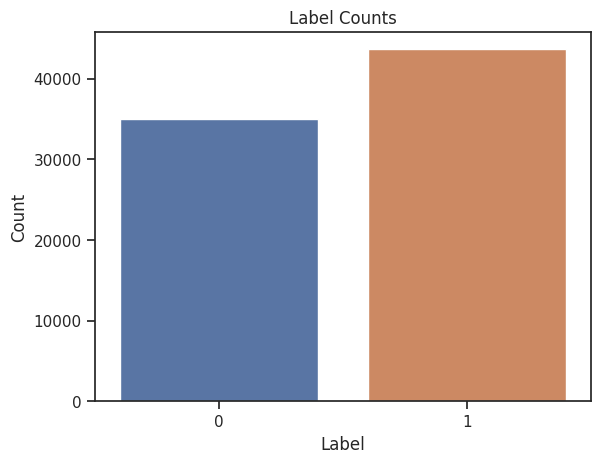

In [33]:
sns.countplot(x='label', data=df)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Counts')
plt.show()

## Cluster Based

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


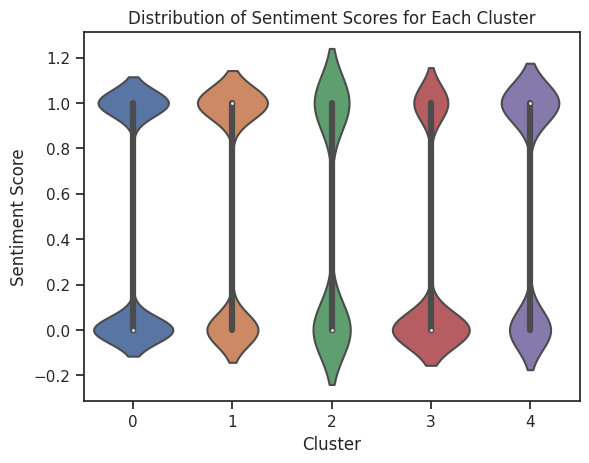

In [34]:
# Create a violin plot of sentiment scores for each cluster
sns.violinplot(x='cluster', y='sentiment', data=df)
plt.xlabel('Cluster')
plt.ylabel('Sentiment Score')
plt.title('Distribution of Sentiment Scores for Each Cluster')
plt.show()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


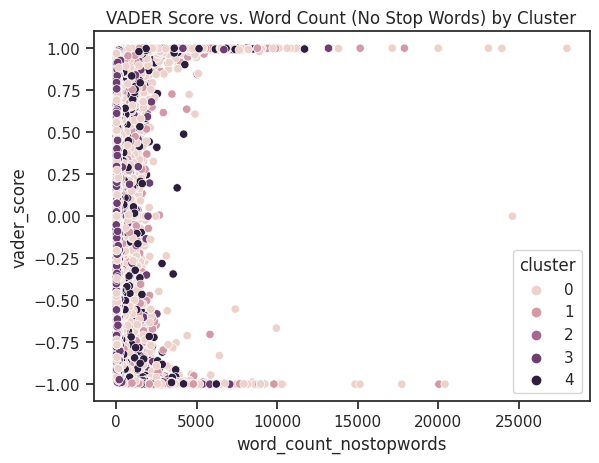

In [35]:
import seaborn as sns

sns.scatterplot(x='word_count_nostopwords', y='vader_score', hue='cluster', data=df)
plt.title('VADER Score vs. Word Count (No Stop Words) by Cluster')
plt.show()

In [37]:
# import matplotlib.pyplot as plt



# # Dimensionality reduction with PCA
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(word_occurrence.T)
# # Create a scatter plot of the text data with cluster labels
# plt.figure(figsize=(10, 8))
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='coolwarm', alpha=0.5)
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.title('PCA Scatter Plot with Cluster Labels')
# plt.show()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from collections import Counter
for label in [0, 1]:
    label_data = df[df['label'] == label]
    word_counts = label_data['text_without_stopwords'].apply(lambda x: Counter(x.split())).sum()
    top_words_by_label[label] = dict(word_counts.most_common(10))

# Create stacked bar chart
top_words_df = pd.DataFrame(top_words_by_label)
top_words_df.plot(kind='bar', stacked=True)
plt.xlabel('Top Words')
plt.ylabel('Frequency')
plt.title('Top Words by Label')
plt.show()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


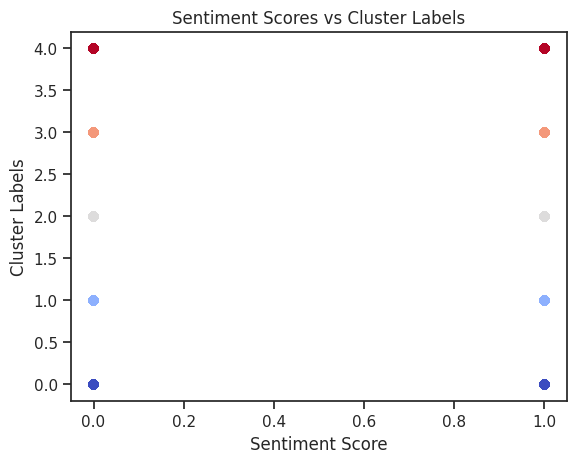

In [40]:
import matplotlib.pyplot as plt

# Create scatter plot of sentiment scores and cluster labels
plt.scatter(df['sentiment'], df['cluster'], c=df['cluster'], cmap='coolwarm')
plt.xlabel('Sentiment Score')
plt.ylabel('Cluster Labels')
plt.title('Sentiment Scores vs Cluster Labels')
plt.show()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


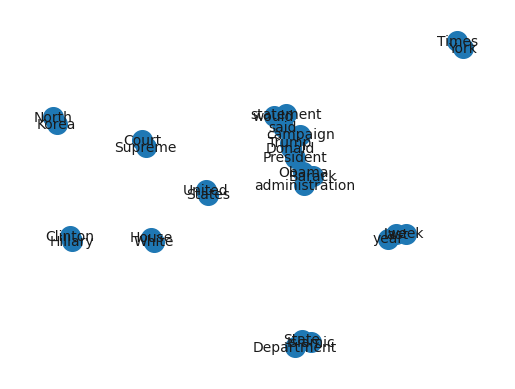

In [41]:
import networkx as nx
from nltk import ngrams
from collections import Counter

# Define the number of top bigrams to keep
num_top_bigrams = 20

# Create a list of all the words in the text data
words = [word for doc in df['text_without_stopwords'] for word in doc.split()]

# Generate a list of bigrams from the list of words
bigrams = ngrams(words, 2)

# Count the occurrences of each bigram
bigram_counts = Counter(bigrams)

# Get the most common bigrams
top_bigrams = bigram_counts.most_common(num_top_bigrams)

# Create a networkx graph
G = nx.Graph()

# Add nodes to the graph
for bigram, count in top_bigrams:
    node1 = bigram[0]
    node2 = bigram[1]
    G.add_node(node1)
    G.add_node(node2)
    
# Add edges to the graph
for bigram, count in top_bigrams:
    node1 = bigram[0]
    node2 = bigram[1]
    G.add_edge(node1, node2, weight=count)

# Define the layout of the graph
pos = nx.spring_layout(G, k=1)

# Draw the nodes and edges of the graph
nx.draw_networkx_nodes(G, pos, node_size=200)
nx.draw_networkx_edges(G, pos, alpha=0.4, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

# Show the graph
plt.axis('off')
plt.show()


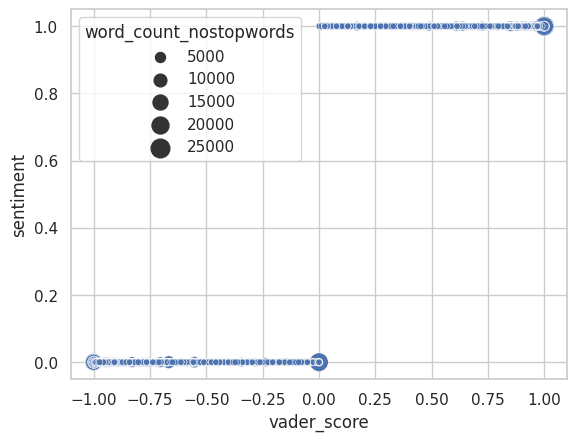

In [11]:
import seaborn as sns

sns.set(style="whitegrid")

# Define the data and variables for the plot
data = df[['vader_score', 'sentiment', 'word_count_nostopwords']]
x_var = 'vader_score'
y_var = 'sentiment'
size_var = 'word_count_nostopwords'

# Create the plot
sns.scatterplot(x=x_var, y=y_var, size=size_var, sizes=(20, 200), data=data)

# Show the plot
plt.show()

In [23]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
df = df.drop('text', axis=1)

In [26]:
df.columns

Index(['label', 'text_without_stopwords', 'vader_score', 'sentiment',
       'cluster', 'no_of_sentences_original_news',
       'avg_word_count_sentencewise_original', 'word_count_nostopwords'],
      dtype='object')

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Canis/data_feature.csv', encoding='utf-8')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78588 entries, 0 to 78587
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   text                                  78588 non-null  object 
 1   label                                 78588 non-null  int64  
 2   text_without_stopwords                78588 non-null  object 
 3   vader_score                           78588 non-null  float64
 4   sentiment                             78588 non-null  int64  
 5   cluster                               78588 non-null  int64  
 6   no_of_sentences_original_news         78588 non-null  int64  
 7   avg_word_count_sentencewise_original  78588 non-null  float64
 8   word_count_nostopwords                78588 non-null  int64  
 9   pos_counts                            78588 non-null  object 
 10  dependency_parsing                    78588 non-null  object 
 11  fk_grade_level 

In [20]:
df.drop('text',axis=1)

label                             text_without_stopwords  vader_score  \
0          0  head conservative Republican faction U.S. Cong...       0.9857   
1          0  Transgender people allowed first time enlist U...       0.9488   
2          0  special counsel investigation links Russia Pre...      -0.6808   
3          0  Trump campaign adviser George Papadopoulos tol...      -0.2201   
4          0  President Donald Trump called U.S. Postal Serv...       0.5896   
...      ...                                                ...          ...   
78583      1  USA wants divide Syria.Great Britain, France, ...       0.3612   
78584      1  Ukrainian coup d'etat cost US nothing nearly n...      -0.6492   
78585      1  European Parliament falsifies history declarin...      -0.9074   
78586      1  European Parliament falsifies history declarin...      -0.9074   
78587      1  leading FSB officer, Segey Beseda, said summit...       0.2732   

       sentiment  cluster  no_of_sentences_original_news  \
0              1        0                             30   
1              1        2                             13   
2              0        0                             17   
3              0        0                             16   
4              1        2                             40   
...          ...      ...                            ...   
78583          1        4                              2   
78584          0        4                              5   
78585          0        2                              5   
78586          0        2                              5   
78587          1        2                              2   

       avg_word_count_sentencewise_original  word_count_nostopwords  \
0                                 29.333333                     880   
1                                 34.615385                     450   
2                                 30.470588                     518   
3                                 27.000000                     432   
4                                 24.550000                     982   
...                                     ...                     ...   
78583                             41.000000                      82   
78584                             23.400000                     117   
78585                             27.600000                     138   
78586                             27.600000                     138   
78587                             30.500000                      61   

                                              pos_counts  \
0      Counter({'NN': 122, 'NNP': 98, 'IN': 94, 'DT':...   
1      Counter({'NN': 60, 'NNP': 58, 'IN': 51, 'DT': ...   
2      Counter({'NNP': 86, 'NN': 72, 'IN': 64, 'DT': ...   
3      Counter({'NNP': 81, 'NN': 52, 'IN': 45, 'DT': ...   
4      Counter({'NN': 145, 'NNP': 122, 'IN': 111, 'DT...   
...                                                  ...   
78583  Counter({'DT': 14, 'NNP': 12, 'IN': 10, 'NN': ...   
78584  Counter({'NNP': 21, 'NN': 20, 'IN': 14, 'DT': ...   
78585  Counter({'IN': 19, 'NN': 18, 'DT': 14, 'NNS': ...   
78586  Counter({'IN': 19, 'NN': 18, 'DT': 14, 'NNS': ...   
78587  Counter({'NNP': 15, 'IN': 11, 'DT': 8, 'NN': 7...   

                                      dependency_parsing  fk_grade_level  \
0      [('The', 'det', 'head'), ('head', 'nsubj', 'ca...            10.9   
1      [('Transgender', 'amod', 'people'), ('people',...            13.1   
2      [('The', 'det', 'investigation'), ('special', ...            10.5   
3      [('Trump', 'compound', 'adviser'), ('campaign'...            10.9   
4      [('President', 'compound', 'Trump'), ('Donald'...             8.6   
...                                                  ...             ...   
78583  [('The', 'det', 'USA'), ('USA', 'nsubj', 'want...            10.0   
78584  [('The', 'det', "d'etat"), ('Ukrainian', 'amod...            10.4   
78585  [('The', 'det', 'Parliament'), ('European', 'c...           

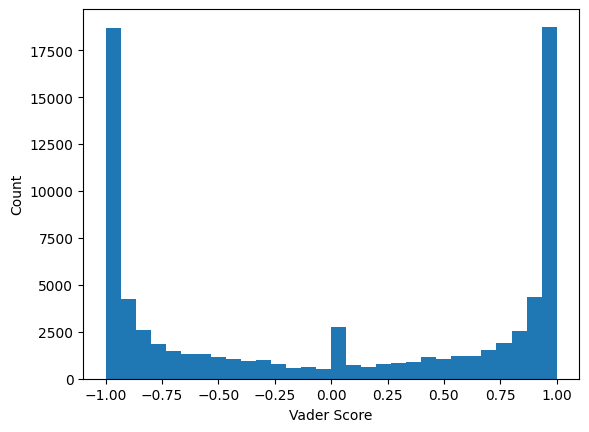

In [21]:
import pandas as pd
import matplotlib.pyplot as plt


# Create histogram of vader_score
plt.hist(df['vader_score'], bins=30)
plt.xlabel('Vader Score')
plt.ylabel('Count')
plt.show()

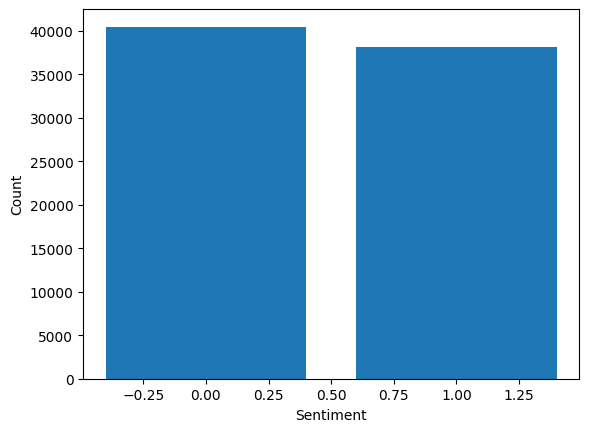

In [22]:
sentiment_counts = df['sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
!pip install pychart

In [15]:
print(df['dependency_parsing'])

0        [('The', 'det', 'head'), ('head', 'nsubj', 'ca...
1        [('Transgender', 'amod', 'people'), ('people',...
2        [('The', 'det', 'investigation'), ('special', ...
3        [('Trump', 'compound', 'adviser'), ('campaign'...
4        [('President', 'compound', 'Trump'), ('Donald'...
                               ...                        
78583    [('The', 'det', 'USA'), ('USA', 'nsubj', 'want...
78584    [('The', 'det', "d'etat"), ('Ukrainian', 'amod...
78585    [('The', 'det', 'Parliament'), ('European', 'c...
78586    [('The', 'det', 'Parliament'), ('European', 'c...
78587    [('A', 'det', 'officer'), ('leading', 'amod', ...
Name: dependency_parsing, Length: 78588, dtype: object


## Lable & Sentiment vise Analysis

In [23]:
# import networkx as nx
# import matplotlib.pyplot as plt


# G = nx.DiGraph()
# pos_counts = df['pos_counts']
# dependency_parsing =df['dependency_parsing']

# # Add nodes and their labels
# for word, count in pos_counts.items():
#     G.add_node(word, label=f"{word} ({count})")

# # Add edges and their labels
# for relation in dependency_parsing:
#     G.add_edge(relation[0], relation[2], label=relation[1])

# # Define the positions of the nodes
# pos = nx.spring_layout(G)

# # Draw the nodes, edges, and labels
# nx.draw_networkx_nodes(G, pos)
# nx.draw_networkx_edges(G, pos)
# nx.draw_networkx_labels(G, pos, nx.get_node_attributes(G, 'label'))
# nx.draw_networkx_edge_labels(G, pos, nx.get_edge_attributes(G, 'label'))

# # Show the plot
# plt.show()

KeyboardInterrupt: ignored

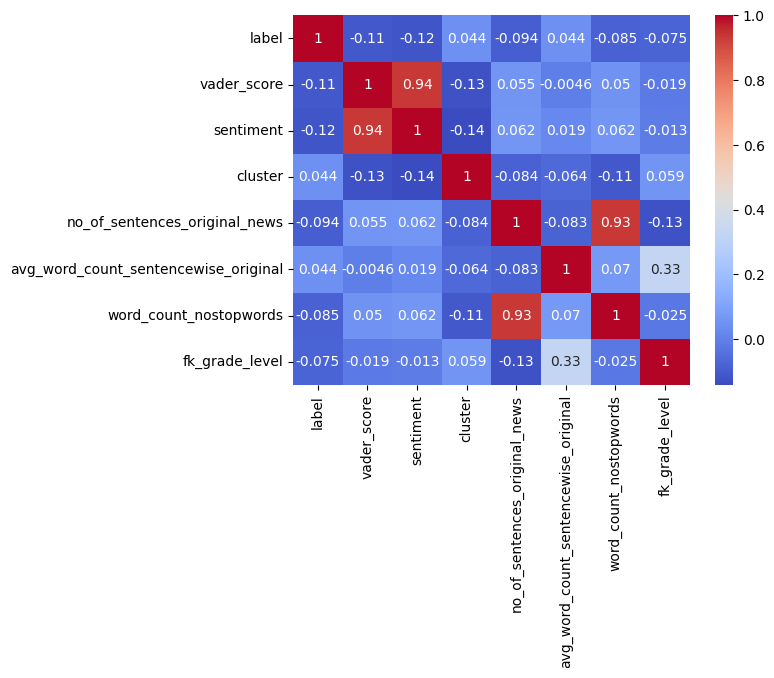

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select columns for correlation matrix
cols = ['label','vader_score', 'sentiment', 'cluster', 'no_of_sentences_original_news', 'avg_word_count_sentencewise_original', 'word_count_nostopwords', 'fk_grade_level']

# Create correlation matrix
corr = df[cols].corr()

# Create heatmap using Seaborn
sns.heatmap(corr, cmap='coolwarm', annot=True)

# Show plot
plt.show()


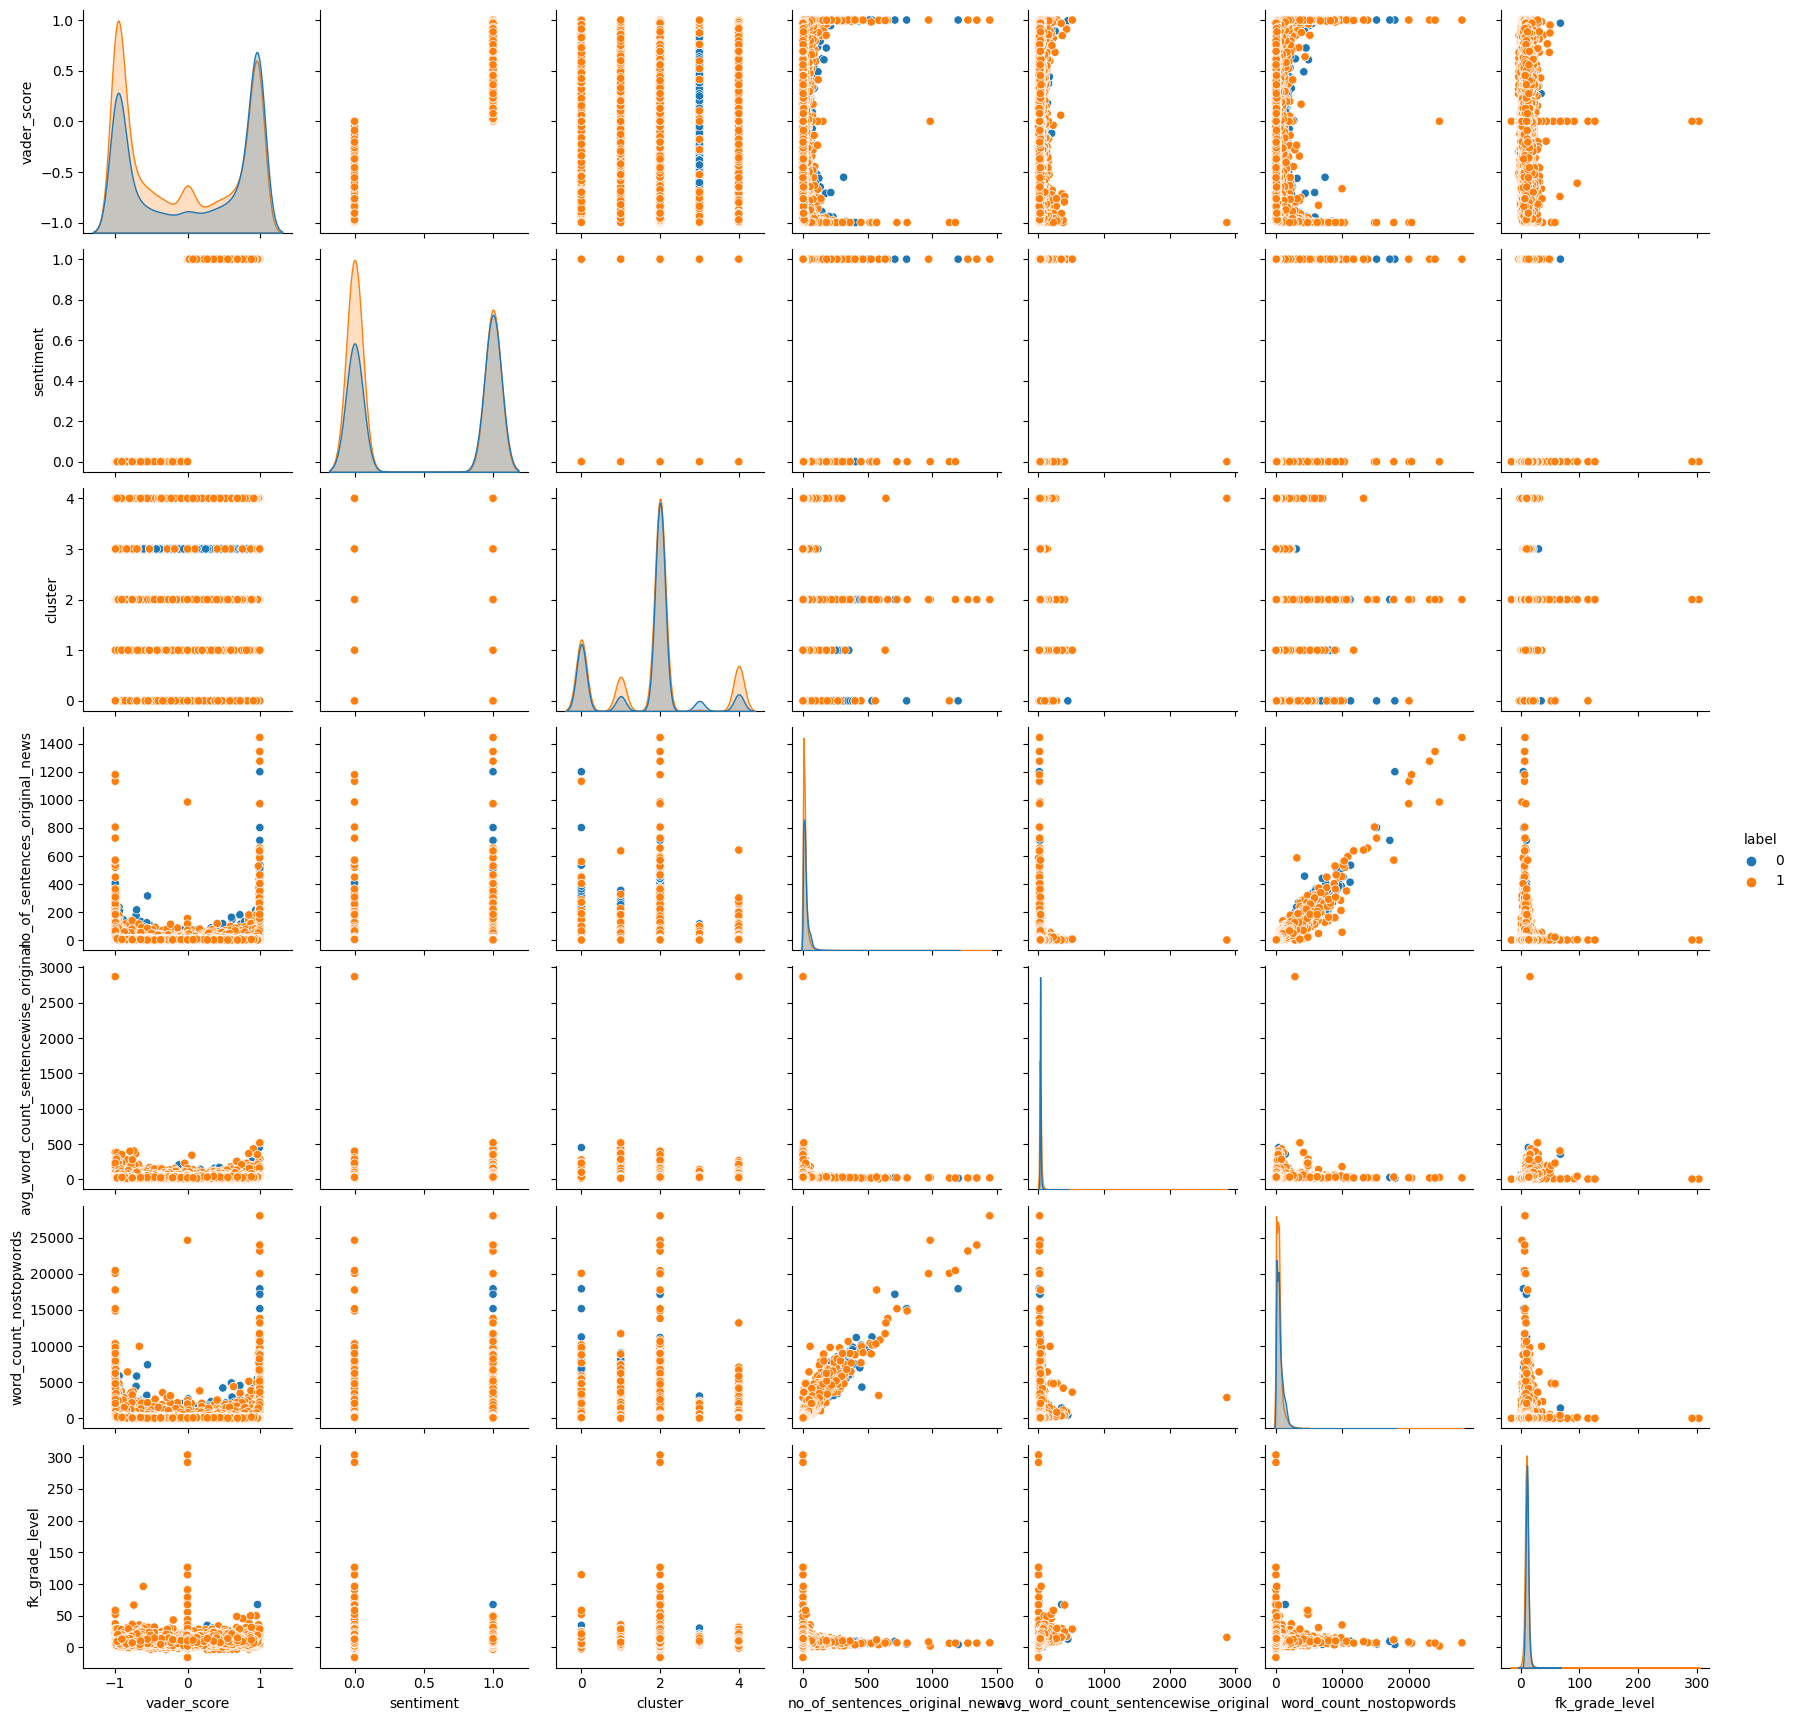

In [5]:
import seaborn as sns
import pandas as pd

# Create pair plot
sns.pairplot(df, hue="label")

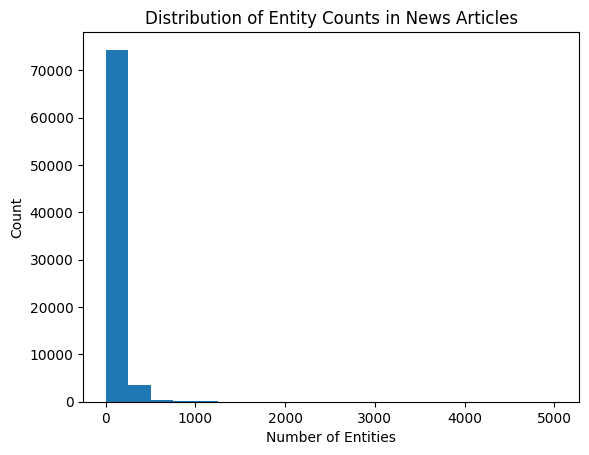

In [25]:
import matplotlib.pyplot as plt
import pandas as pd


# Extract the number of entities for each news article
entity_counts = [len(entities.split(',')) for entities in df['entities']]

# Create a histogram of the entity counts
plt.hist(entity_counts, bins=20)
plt.xlabel('Number of Entities')
plt.ylabel('Count')
plt.title('Distribution of Entity Counts in News Articles')
plt.show()


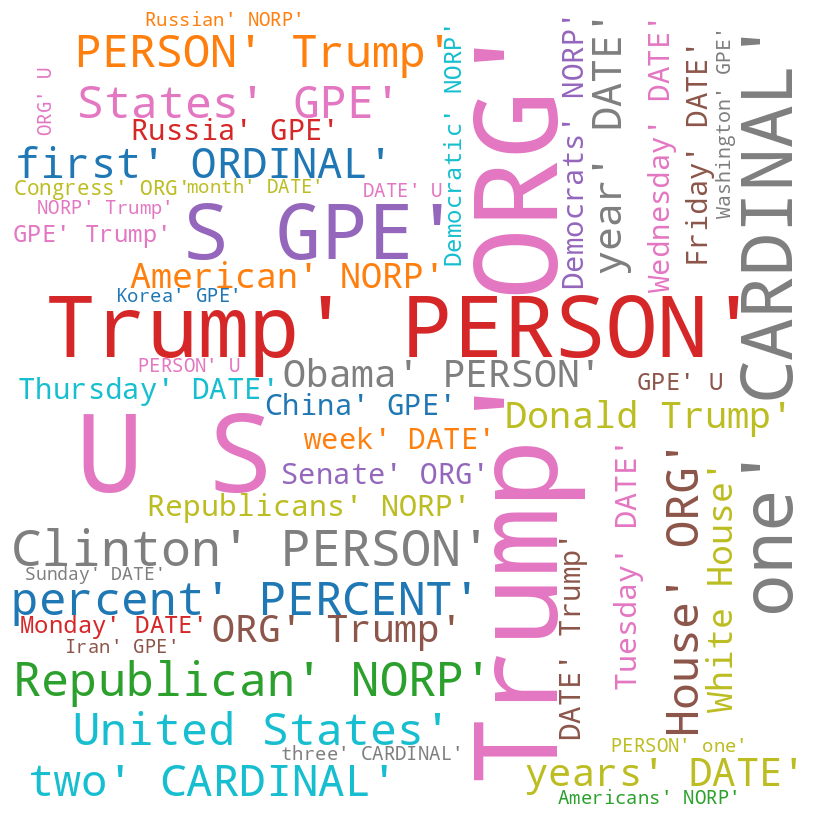

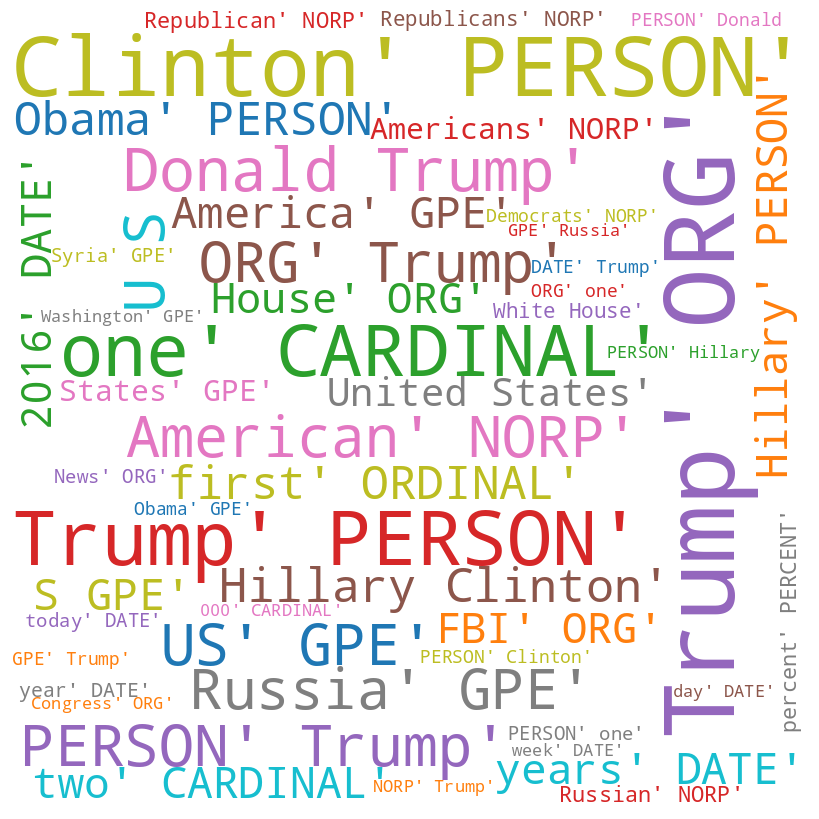

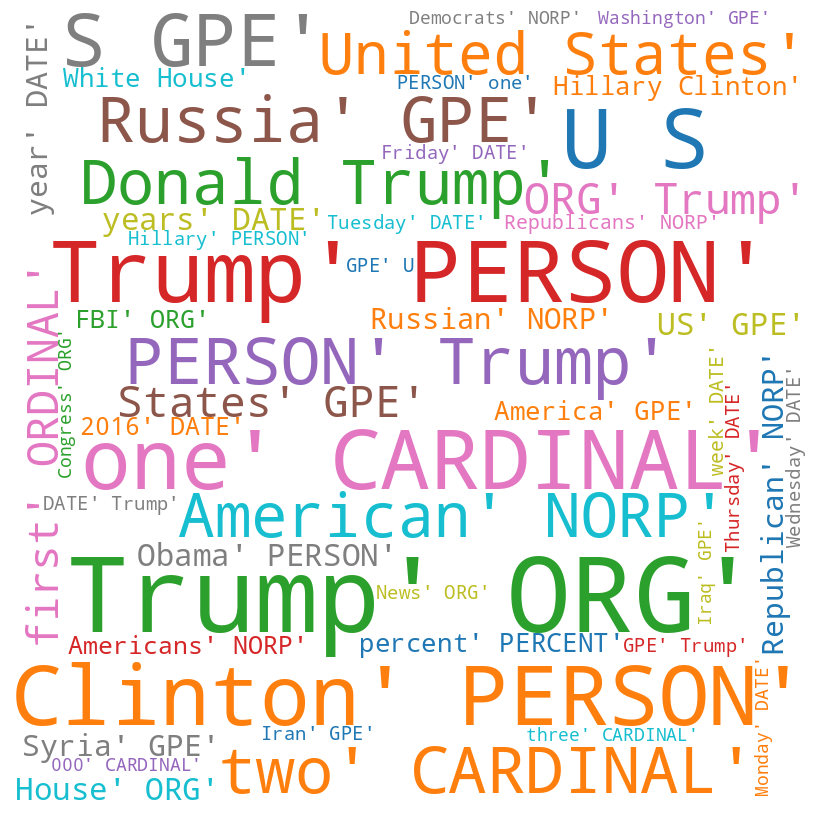

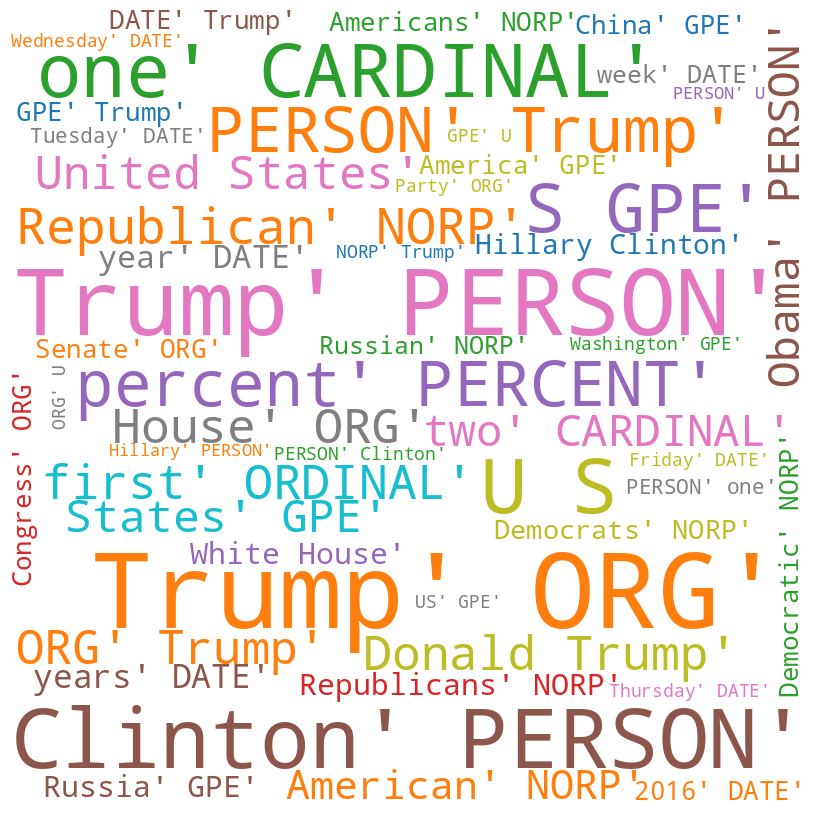

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate the data by label and sentiment
label_0 = df[df['label']==0]
label_1 = df[df['label']==1]

sentiment_0 = df[df['sentiment']==0]
sentiment_1 = df[df['sentiment']==1]

# Create a function to generate word clouds for entities
def create_word_cloud(entities):
    # Join the entities into a single string
    entity_string = ' '.join(entities)

    # Create a WordCloud object with the desired parameters
    wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='tab10', max_words=50).generate(entity_string)

    # Plot the word cloud
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

# Generate word clouds for entities in news articles labeled 0 and 1 separately
create_word_cloud(label_0['entities'])
create_word_cloud(label_1['entities'])

# Generate word clouds for entities in news articles with sentiment 0 and 1 separately
create_word_cloud(sentiment_0['entities'])
create_word_cloud(sentiment_1['entities'])


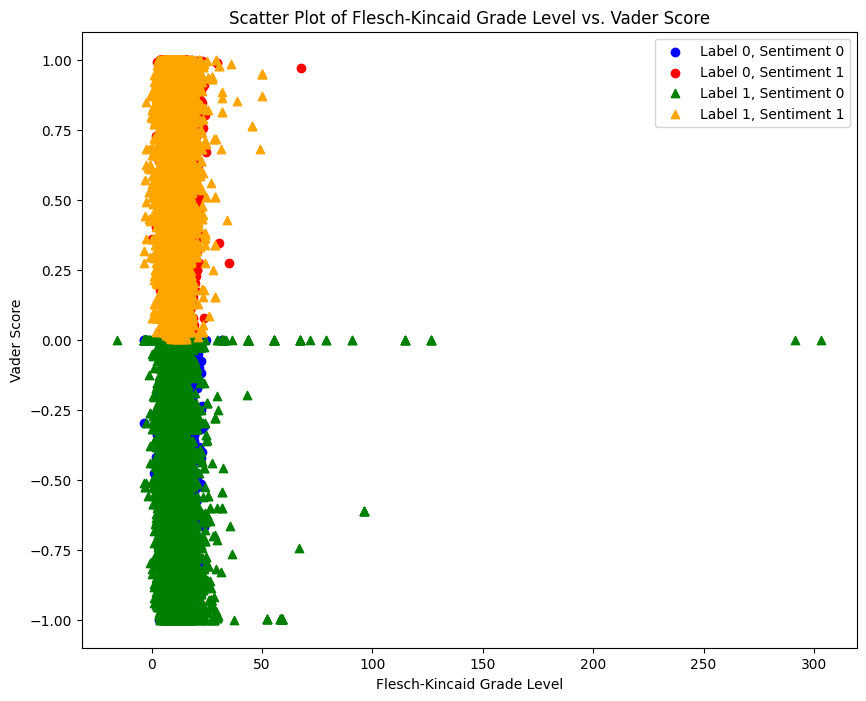

In [28]:
import matplotlib.pyplot as plt

# filter data by label and sentiment
df_label0_sent0 = df[(df['label']==0) & (df['sentiment']==0)]
df_label0_sent1 = df[(df['label']==0) & (df['sentiment']==1)]
df_label1_sent0 = df[(df['label']==1) & (df['sentiment']==0)]
df_label1_sent1 = df[(df['label']==1) & (df['sentiment']==1)]

# create scatter plot
plt.figure(figsize=(10,8))
plt.scatter(df_label0_sent0['fk_grade_level'], df_label0_sent0['vader_score'], c='blue', marker='o', label='Label 0, Sentiment 0')
plt.scatter(df_label0_sent1['fk_grade_level'], df_label0_sent1['vader_score'], c='red', marker='o', label='Label 0, Sentiment 1')
plt.scatter(df_label1_sent0['fk_grade_level'], df_label1_sent0['vader_score'], c='green', marker='^', label='Label 1, Sentiment 0')
plt.scatter(df_label1_sent1['fk_grade_level'], df_label1_sent1['vader_score'], c='orange', marker='^', label='Label 1, Sentiment 1')
plt.xlabel('Flesch-Kincaid Grade Level')
plt.ylabel('Vader Score')
plt.legend(loc='upper right')
plt.title('Scatter Plot of Flesch-Kincaid Grade Level vs. Vader Score')
plt.show()


<ipython-input-29-dc61bb090a79>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label_0['word_length'] = df_label_0['text_without_stopwords'].apply(lambda x: len(x))
<ipython-input-29-dc61bb090a79>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label_1['word_length'] = df_label_1['text_without_stopwords'].apply(lambda x: len(x))


<Axes: >

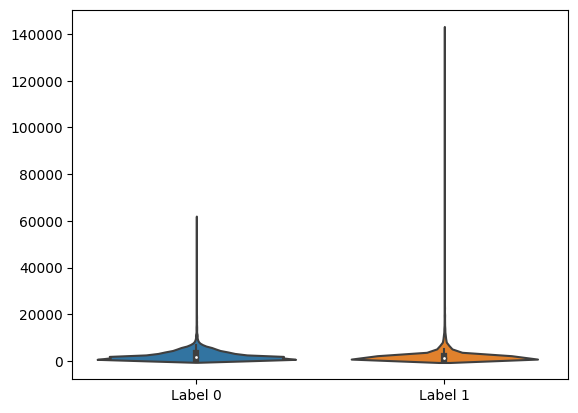

In [29]:
import seaborn as sns
import pandas as pd

# Subset the data by label
df_label_0 = df[df['label']==0]
df_label_1 = df[df['label']==1]

# Create a new column with the length of each word
df_label_0['word_length'] = df_label_0['text_without_stopwords'].apply(lambda x: len(x))
df_label_1['word_length'] = df_label_1['text_without_stopwords'].apply(lambda x: len(x))

# Combine the two dataframes
df_word_length = pd.concat([df_label_0['word_length'], df_label_1['word_length']], axis=1)
df_word_length.columns = ['Label 0', 'Label 1']

# Create the violin plot
sns.violinplot(data=df_word_length)


## CLuster Vise analysis

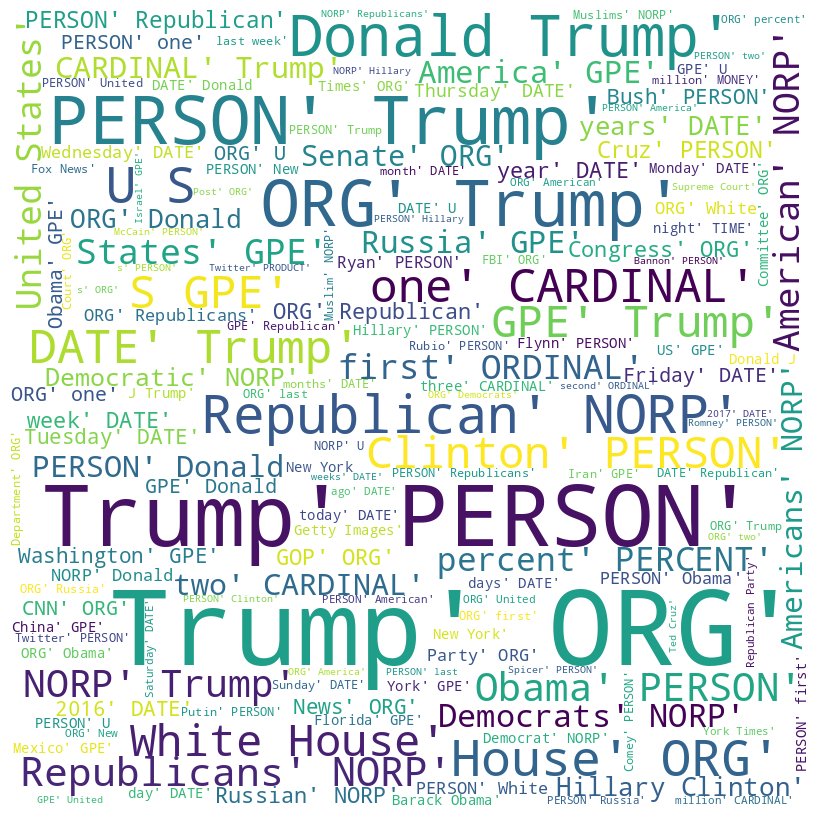

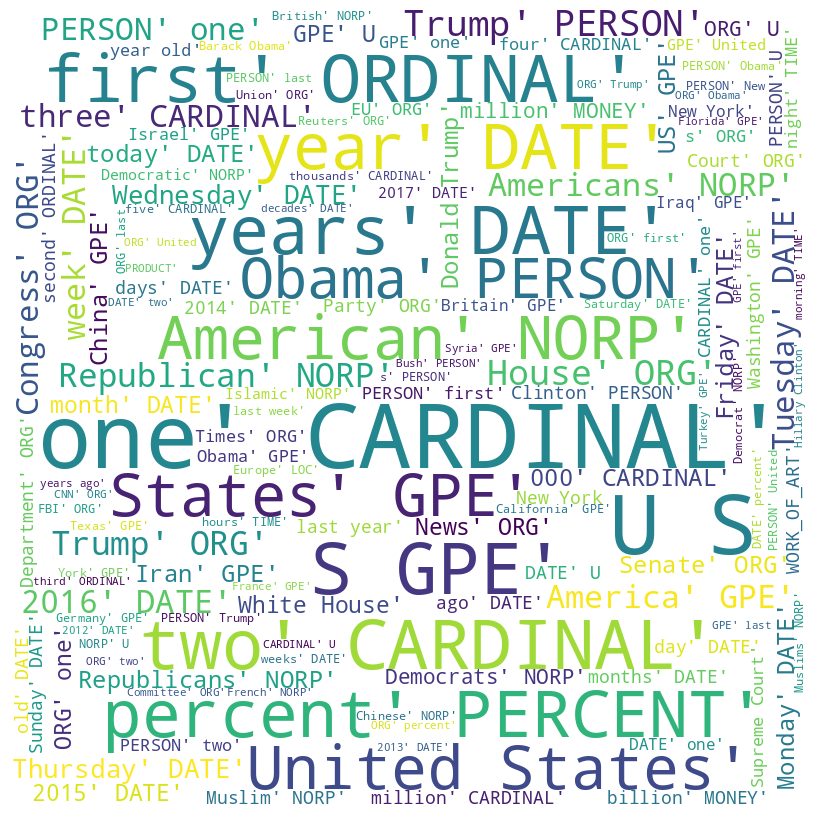

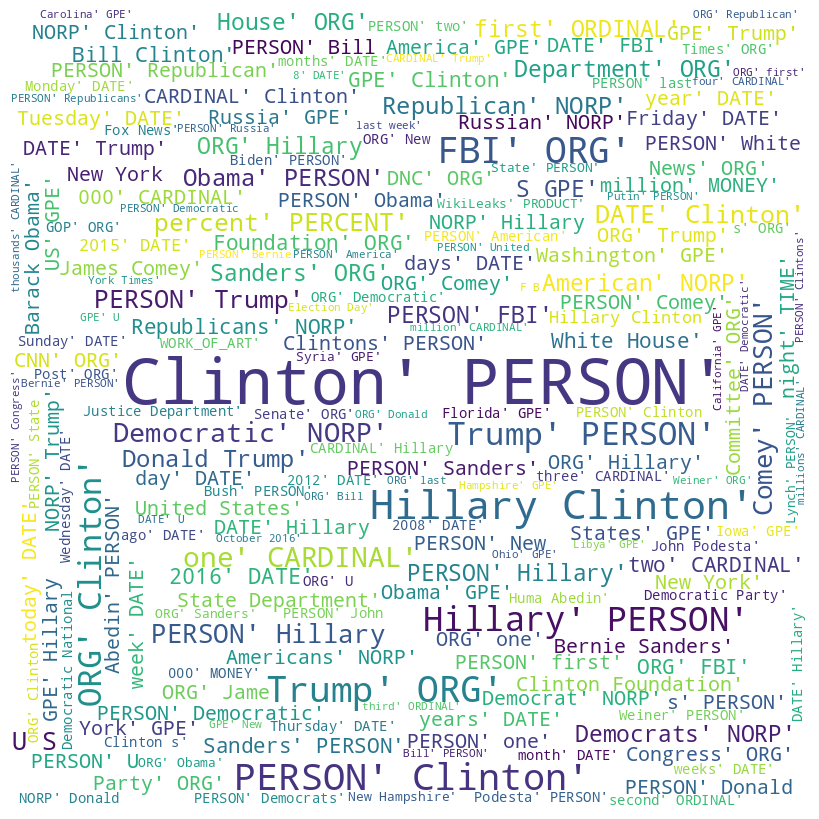

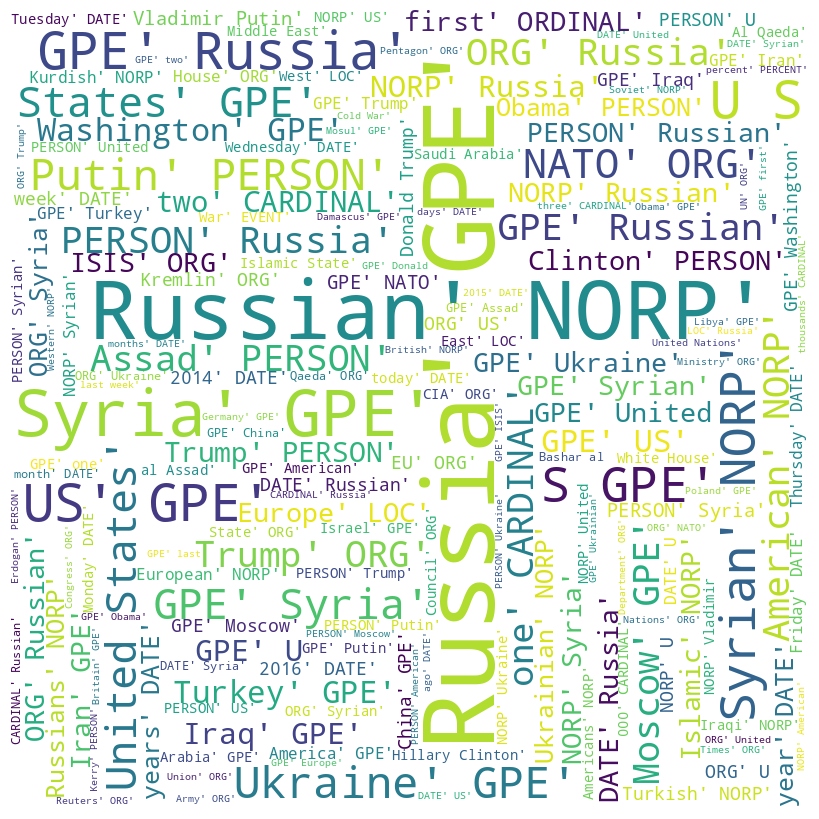

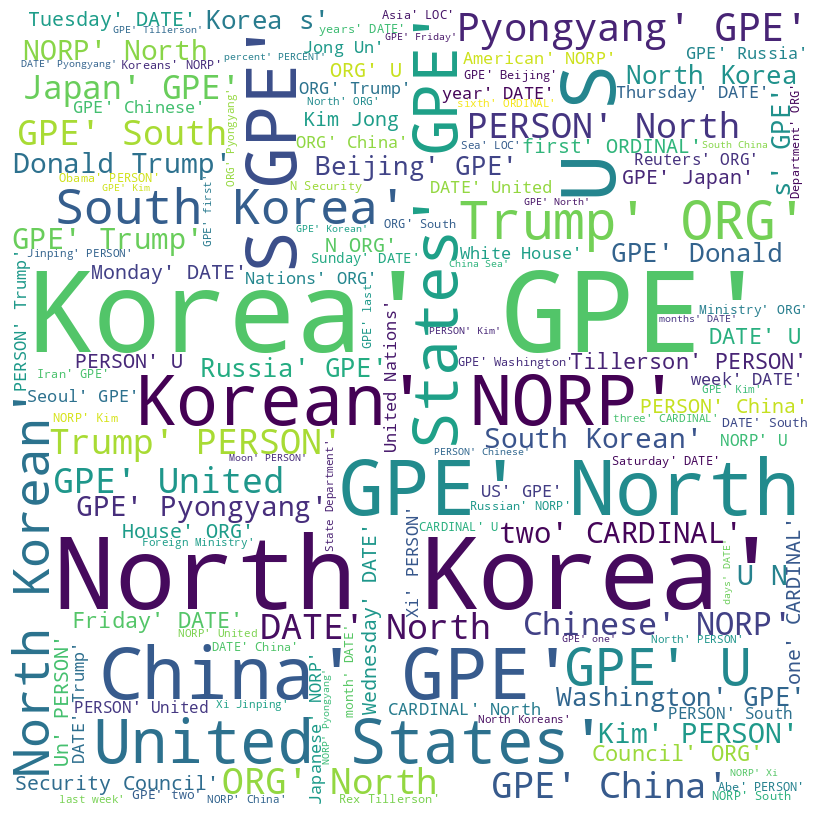

In [4]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Create word clouds for each cluster
for cluster in df['cluster'].unique():
    # Select data for the current cluster
    cluster_df = df[df['cluster'] == cluster]
    
    # Concatenate entities for all articles in the current cluster
    entities_text = ' '.join(cluster_df['entities'])
    
    # Create word cloud for entities in the current cluster
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(entities_text) 
    
    # Plot the word cloud
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    
    # Save the word cloud
    plt.savefig(f'wordcloud_cluster_{cluster}.png')
    plt.show()


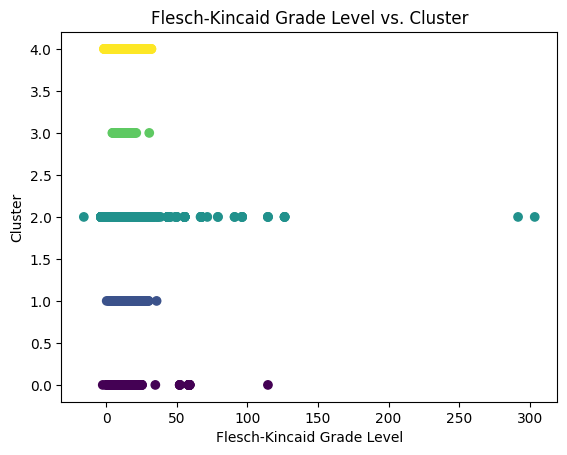

In [5]:
import matplotlib.pyplot as plt

# Create a scatter plot of fk_grade_level vs. cluster
plt.scatter(df['fk_grade_level'], df['cluster'], c=df['cluster'])

# Add labels and title
plt.xlabel('Flesch-Kincaid Grade Level')
plt.ylabel('Cluster')
plt.title('Flesch-Kincaid Grade Level vs. Cluster')

# Show the plot
plt.show()


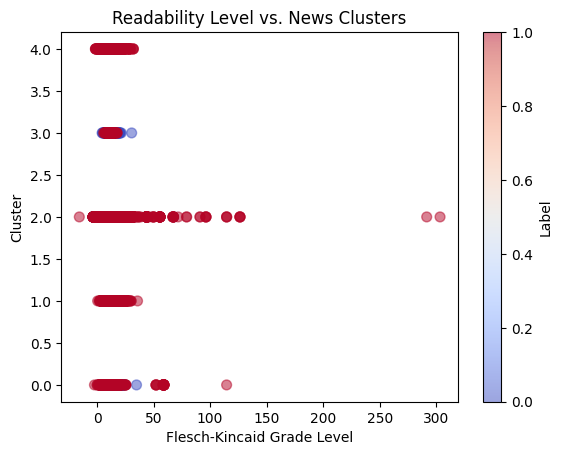

In [6]:
import matplotlib.pyplot as plt

# Create a scatter plot with Flesch-Kincaid Grade Level on the x-axis and cluster on the y-axis
plt.scatter(df['fk_grade_level'], df['cluster'], c=df['label'], cmap='coolwarm', alpha=0.5, s=50)

# Add labels and title
plt.xlabel('Flesch-Kincaid Grade Level')
plt.ylabel('Cluster')
plt.title('Readability Level vs. News Clusters')

# Add a colorbar legend
cbar = plt.colorbar()
cbar.set_label('Label')

# Show the plot
plt.show()


## Entity

In [4]:
import matplotlib.pyplot as plt


<ipython-input-9-972cd85d4dc8>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 0].set_xticklabels([x[:20] + '...' if len(x) > 20 else x for x in top_entities_00.index])
<ipython-input-9-972cd85d4dc8>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 1].set_xticklabels([x[:20] + '...' if len(x) > 20 else x for x in top_entities_01.index])
<ipython-input-9-972cd85d4dc8>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 0].set_xticklabels([x[:20] + '...' if len(x) > 20 else x for x in top_entities_10.index])
<ipython-input-9-972cd85d4dc8>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 1].set_xticklabels([x[:20] + '...' if len(x) > 20 else x for x in top_entities_11.index])


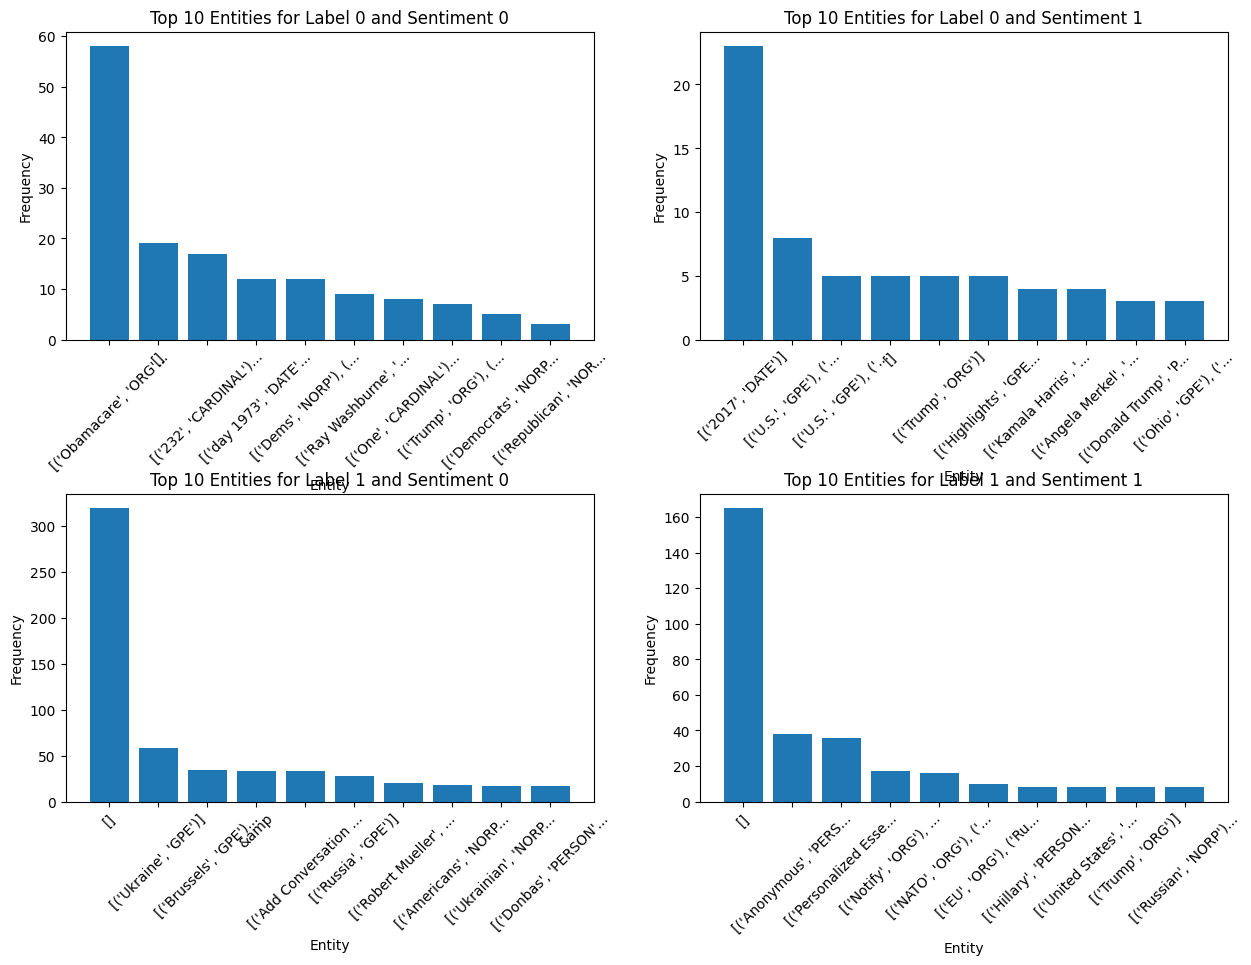

In [9]:
# create bar plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
data = df
# filter entities by label and sentiment
entities_00 = data.loc[(data['label'] == 0) & (data['sentiment'] == 0), 'entities'].str.split(';').explode().str.strip()
entities_01 = data.loc[(data['label'] == 0) & (data['sentiment'] == 1), 'entities'].str.split(';').explode().str.strip()
entities_10 = data.loc[(data['label'] == 1) & (data['sentiment'] == 0), 'entities'].str.split(';').explode().str.strip()
entities_11 = data.loc[(data['label'] == 1) & (data['sentiment'] == 1), 'entities'].str.split(';').explode().str.strip()

# get top 10 entities for each category
top_entities_00 = entities_00.value_counts().nlargest(10)
top_entities_01 = entities_01.value_counts().nlargest(10)
top_entities_10 = entities_10.value_counts().nlargest(10)
top_entities_11 = entities_11.value_counts().nlargest(10)
# plot top 10 entities for label 0 and sentiment 0
axs[0, 0].bar(top_entities_00.index, top_entities_00.values)
axs[0, 0].set_title('Top 10 Entities for Label 0 and Sentiment 0')
axs[0, 0].set_xlabel('Entity')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].tick_params(axis='x', labelrotation=45)
axs[0, 0].set_xticklabels([x[:20] + '...' if len(x) > 20 else x for x in top_entities_00.index])

# plot top 10 entities for label 0 and sentiment 1
axs[0, 1].bar(top_entities_01.index, top_entities_01.values)
axs[0, 1].set_title('Top 10 Entities for Label 0 and Sentiment 1')
axs[0, 1].set_xlabel('Entity')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].tick_params(axis='x', labelrotation=45)
axs[0, 1].set_xticklabels([x[:20] + '...' if len(x) > 20 else x for x in top_entities_01.index])

# plot top 10 entities for label 1 and sentiment 0
axs[1, 0].bar(top_entities_10.index, top_entities_10.values)
axs[1, 0].set_title('Top 10 Entities for Label 1 and Sentiment 0')
axs[1, 0].set_xlabel('Entity')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].tick_params(axis='x', labelrotation=45)
axs[1, 0].set_xticklabels([x[:20] + '...' if len(x) > 20 else x for x in top_entities_10.index])

# plot top 10 entities for label 1 and sentiment 1
axs[1, 1].bar(top_entities_11.index, top_entities_11.values)
axs[1, 1].set_title('Top 10 Entities for Label 1 and Sentiment 1')
axs[1, 1].set_xlabel('Entity')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].tick_params(axis='x', labelrotation=45)
axs[1, 1].set_xticklabels([x[:20] + '...' if len(x) > 20 else x for x in top_entities_11.index])

# adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# show plot
plt.show()


In [10]:
df['entities']

0        [(Republican, NORP), (U.S. Congress, ORG), (Su...
1        [(Transgender, ORG), (first, ORDINAL), (U.S., ...
2        [(Russia, GPE), (Trump, PERSON), (2016, DATE),...
3        [(Trump, ORG), (George Papadopoulos, PERSON), ...
4        [(Donald Trump, PERSON), (U.S. Postal Service,...
                               ...                        
78583    [(USA, GPE), (Syria, GPE), (Great Britain, GPE...
78584    [(Ukrainian, NORP), (US, GPE), (Ukraine, GPE),...
78585    [(European Parliament, ORG), (Molotov-Ribbentr...
78586    [(European Parliament, ORG), (Molotov-Ribbentr...
78587    [(FSB, ORG), (Segey Beseda, PERSON), (Commonwe...
Name: entities, Length: 78588, dtype: object

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


# Define function to clean entity names
def clean_entity(entity):
    return ''.join(e for e in entity if e.isalnum() or e.isspace())

# Clean entity names
df['entities'] = df['entities'].apply(lambda x: ';'.join(clean_entity(e) for e in x.split(';')))



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78588 entries, 0 to 78587
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   text                                  78588 non-null  object 
 1   label                                 78588 non-null  int64  
 2   text_without_stopwords                78588 non-null  object 
 3   vader_score                           78588 non-null  float64
 4   sentiment                             78588 non-null  int64  
 5   cluster                               78588 non-null  int64  
 6   no_of_sentences_original_news         78588 non-null  int64  
 7   avg_word_count_sentencewise_original  78588 non-null  float64
 8   word_count_nostopwords                78588 non-null  int64  
 9   pos_counts                            78588 non-null  object 
 10  dependency_parsing                    78588 non-null  object 
 11  fk_grade_level 

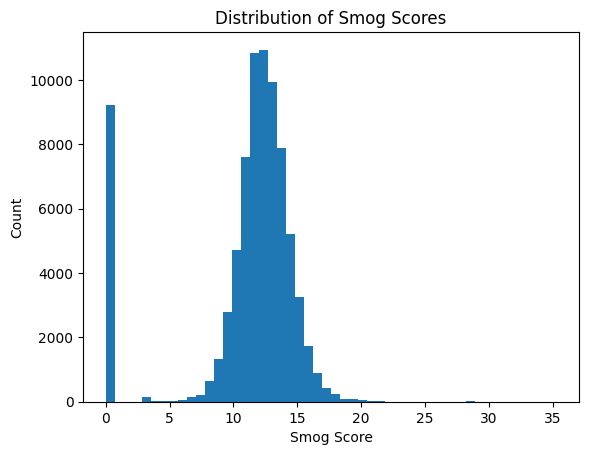

In [10]:
import matplotlib.pyplot as plt

# Create a histogram of the smog_score column
plt.hist(df['smog_score'], bins=50)

# Set the title and labels
plt.title('Distribution of Smog Scores')
plt.xlabel('Smog Score')
plt.ylabel('Count')

# Show the plot
plt.show()


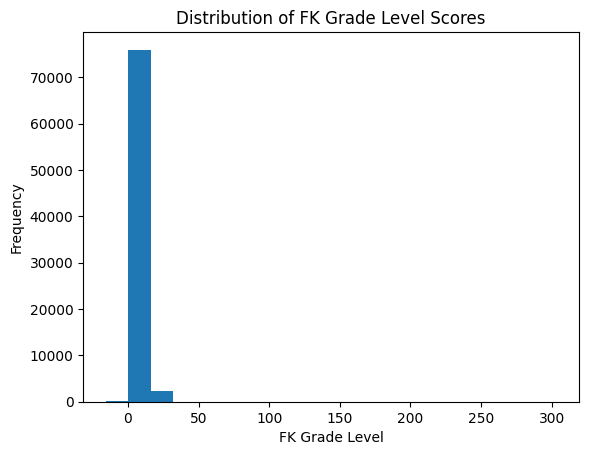

In [12]:
import matplotlib.pyplot as plt
import pandas as pd



# Create a histogram
plt.hist(df['fk_grade_level'], bins=20)
plt.xlabel('FK Grade Level')
plt.ylabel('Frequency')
plt.title('Distribution of FK Grade Level Scores')
plt.show()


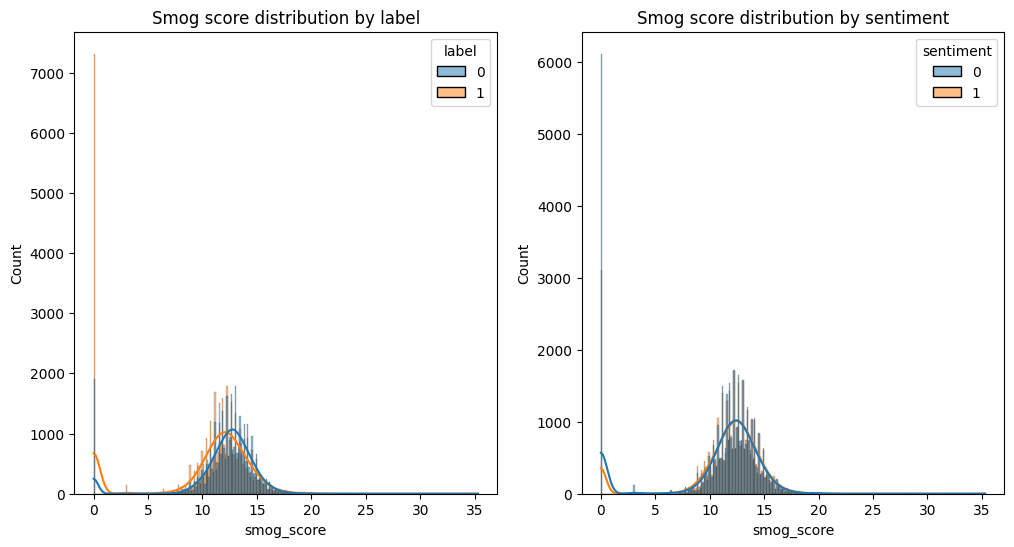

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# plot smog scores by label
sns.histplot(data=df, x='smog_score', hue='label', kde=True, ax=ax[0])
ax[0].set_title('Smog score distribution by label')

# plot smog scores by sentiment
sns.histplot(data=df, x='smog_score', hue='sentiment', kde=True, ax=ax[1])
ax[1].set_title('Smog score distribution by sentiment')

# display the plot
plt.show()


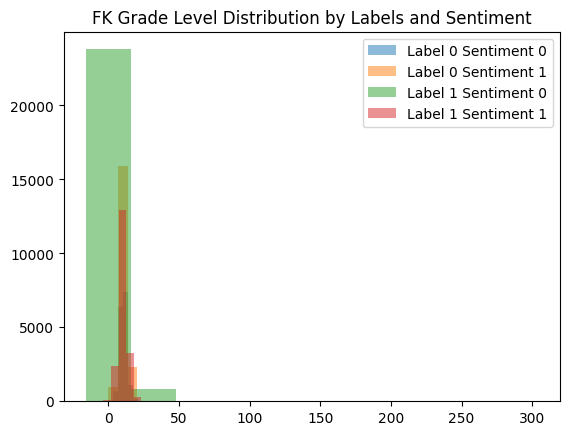

In [14]:
import matplotlib.pyplot as plt

# Filter data by label and sentiment
label_0_sentiment_0 = df[(df['label'] == 0) & (df['sentiment'] == 0)]
label_0_sentiment_1 = df[(df['label'] == 0) & (df['sentiment'] == 1)]
label_1_sentiment_0 = df[(df['label'] == 1) & (df['sentiment'] == 0)]
label_1_sentiment_1 = df[(df['label'] == 1) & (df['sentiment'] == 1)]

# Plot histograms
plt.hist(label_0_sentiment_0['fk_grade_level'], alpha=0.5, label='Label 0 Sentiment 0')
plt.hist(label_0_sentiment_1['fk_grade_level'], alpha=0.5, label='Label 0 Sentiment 1')
plt.hist(label_1_sentiment_0['fk_grade_level'], alpha=0.5, label='Label 1 Sentiment 0')
plt.hist(label_1_sentiment_1['fk_grade_level'], alpha=0.5, label='Label 1 Sentiment 1')

# Add title and legend
plt.title('FK Grade Level Distribution by Labels and Sentiment')
plt.legend(loc='upper right')

# Show plot
plt.show()


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78588 entries, 0 to 78587
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   text                                  78588 non-null  object 
 1   label                                 78588 non-null  int64  
 2   text_without_stopwords                78588 non-null  object 
 3   vader_score                           78588 non-null  float64
 4   sentiment                             78588 non-null  int64  
 5   cluster                               78588 non-null  int64  
 6   no_of_sentences_original_news         78588 non-null  int64  
 7   avg_word_count_sentencewise_original  78588 non-null  float64
 8   word_count_nostopwords                78588 non-null  int64  
 9   pos_counts                            78588 non-null  object 
 10  dependency_parsing                    78588 non-null  object 
 11  fk_grade_level 

In [9]:
df['entities']

0        [('Republican', 'NORP'), ('U.S. Congress', 'OR...
1        [('Transgender', 'ORG'), ('first', 'ORDINAL'),...
2        [('Russia', 'GPE'), ('Trump', 'PERSON'), ('201...
3        [('Trump', 'ORG'), ('George Papadopoulos', 'PE...
4        [('Donald Trump', 'PERSON'), ('U.S. Postal Ser...
                               ...                        
78583    [('USA', 'GPE'), ('Syria', 'GPE'), ('Great Bri...
78584    [('Ukrainian', 'NORP'), ('US', 'GPE'), ('Ukrai...
78585    [('European Parliament', 'ORG'), ('Molotov-Rib...
78586    [('European Parliament', 'ORG'), ('Molotov-Rib...
78587    [('FSB', 'ORG'), ('Segey Beseda', 'PERSON'), (...
Name: entities, Length: 78588, dtype: object

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
ix = [('Democratic', 'NORP'), ('Illinois', 'GPE'), ('two-year', 'DATE'), ('House', 'ORG'), ('Thursday', 'DATE'), ('nearly 2,000', 'CARDINAL'), ('fiscal 2018', 'DATE')]
for i in ix:
  print(i)

('Democratic', 'NORP')
('Illinois', 'GPE')
('two-year', 'DATE')
('House', 'ORG')
('Thursday', 'DATE')
('nearly 2,000', 'CARDINAL')
('fiscal 2018', 'DATE')


In [10]:
for i in ix:
  if len(i)>1 and i[1]=='DATE':
    print(i)

('two-year', 'DATE')
('Thursday', 'DATE')
('fiscal 2018', 'DATE')


In [27]:
top_entities ={}
categories= ['PERSON', 'ORG','GPE', 'NORP', 'LOC','MONEY','WORK_OF_ART','PRODUCT','FAC', 'EVENT']
for category in categories:
    entities = []
    for i in range(len(df)):
        string=(df['entities'][i].strip()[1:-1]).split("), (")
        for entity in string:
            #print(entity)
            if entity.split(",")!=['']:
                final = entity.split(",")[1]
                if category in final:
                  entities.append(entity.split(",")[0])
    top_entities[category] = pd.Series(entities).value_counts()[:10]

In [20]:
top_entities

{'PERSON': 'Trump'            128724
 'one'               45257
 'U.S.'              40346
 'Clinton'           37331
 'Obama'             32645
 'Republican'        30412
 'first'             28599
 'United States'     28141
 'two'               28122
 'Donald Trump'      27998
 dtype: int64,
 'ORG': 'Trump'            128724
 'one'               45257
 'U.S.'              40346
 'Clinton'           37331
 'Obama'             32645
 'Republican'        30412
 'first'             28599
 'United States'     28141
 'two'               28122
 'Donald Trump'      27998
 dtype: int64,
 'GPE': 'Trump'            128724
 'one'               45257
 'U.S.'              40346
 'Clinton'           37331
 'Obama'             32645
 'Republican'        30412
 'first'             28599
 'United States'     28141
 'two'               28122
 'Donald Trump'      27998
 dtype: int64,
 'NORP': 'Trump'            128724
 'one'               45257
 'U.S.'              40346
 'Clinton'           37331
 'Oba

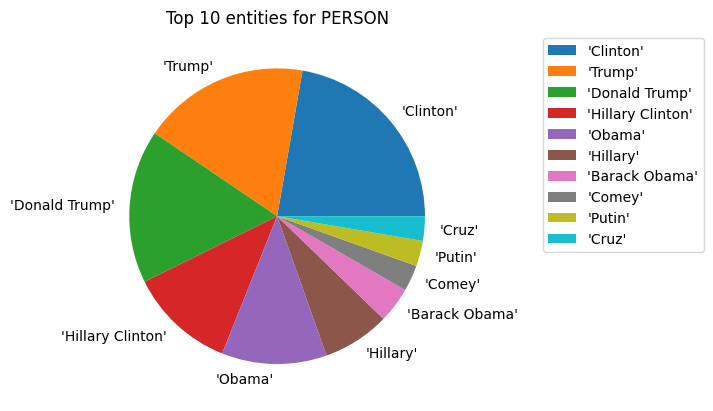

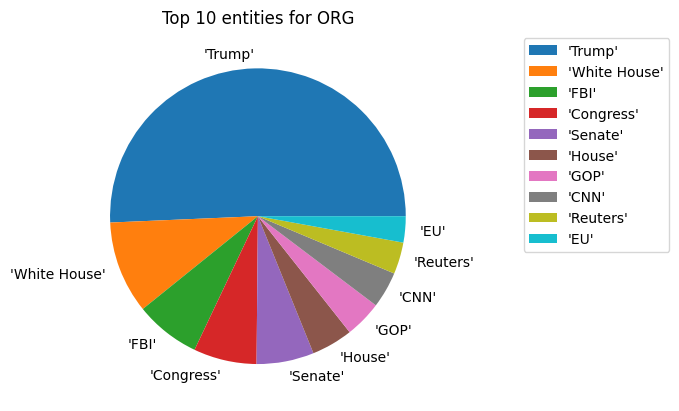

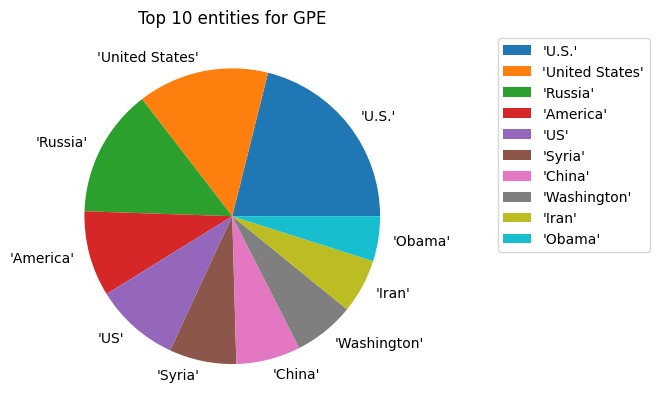

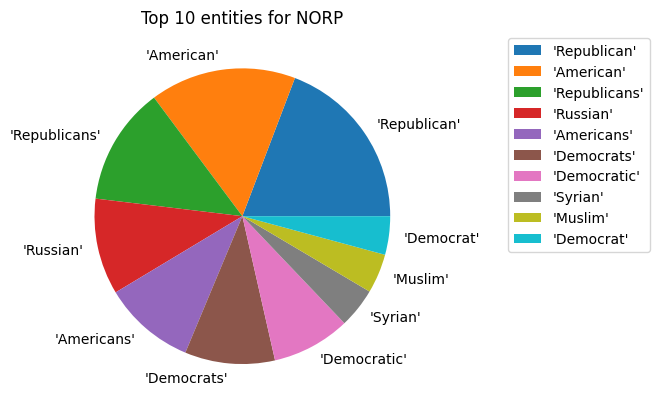

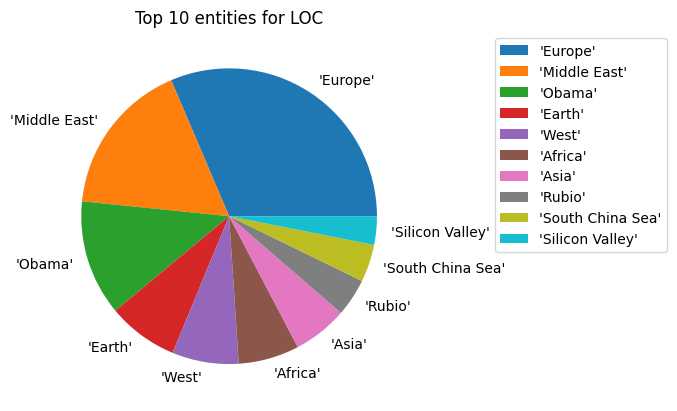

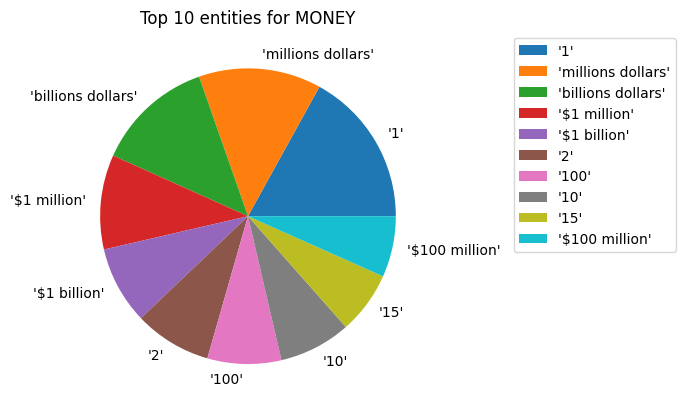

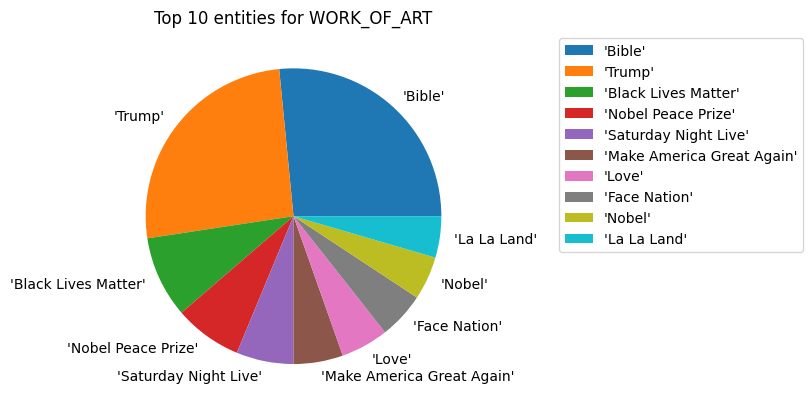

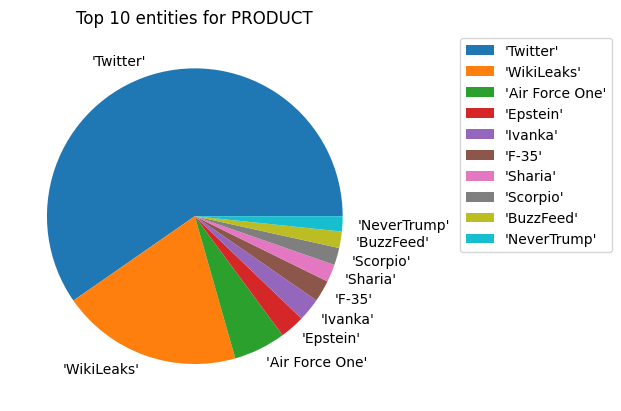

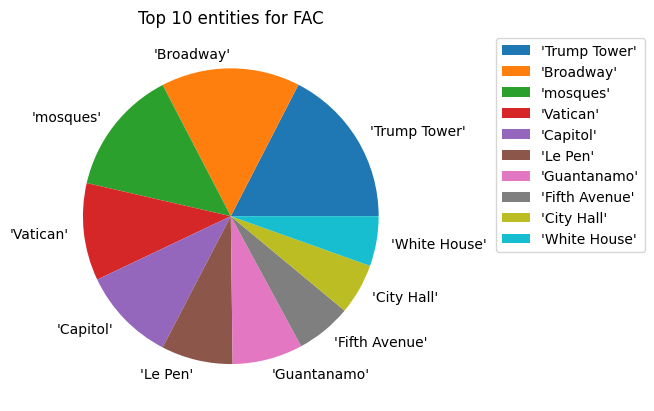

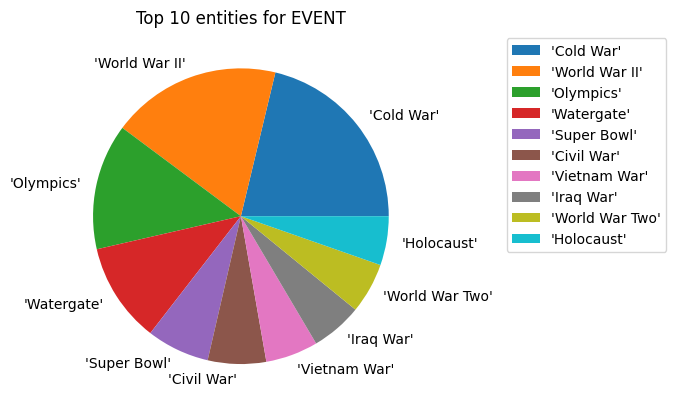

In [28]:
for category, entities in top_entities.items():
    if entities.empty:
        continue  # Skip empty categories
    plt.figure()
    plt.title(f'Top 10 entities for {category}')
    entities.plot(kind='pie')
    plt.ylabel(None)
    plt.legend(bbox_to_anchor=(1.2, 1))
    plt.show()

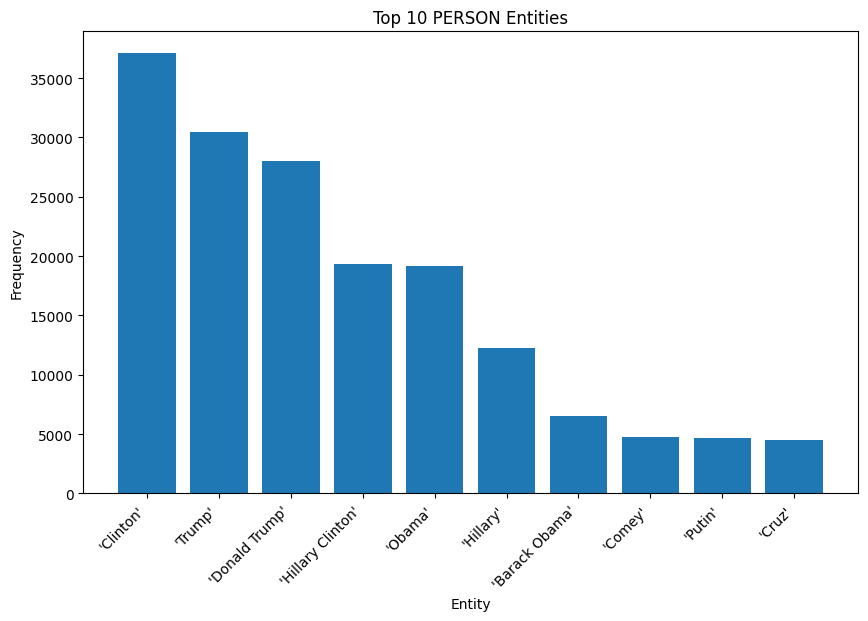

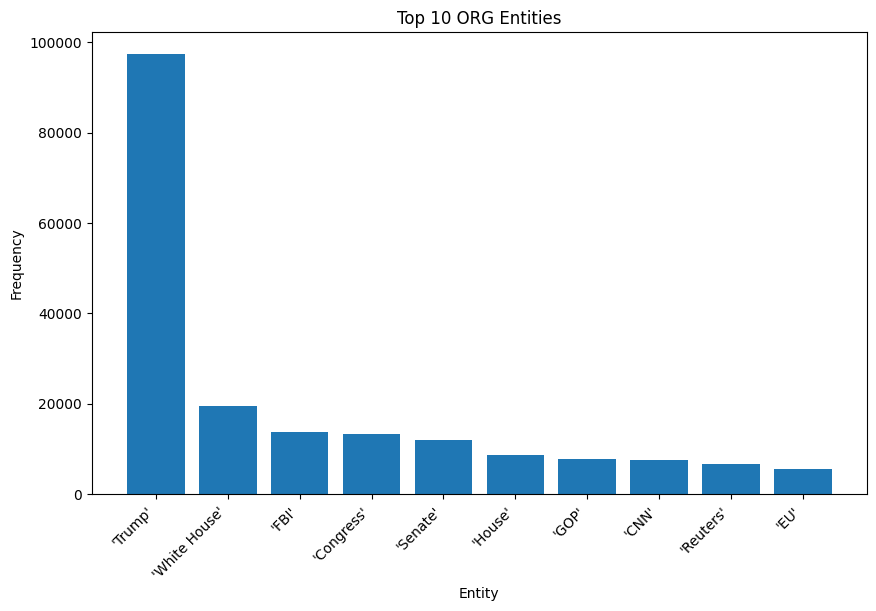

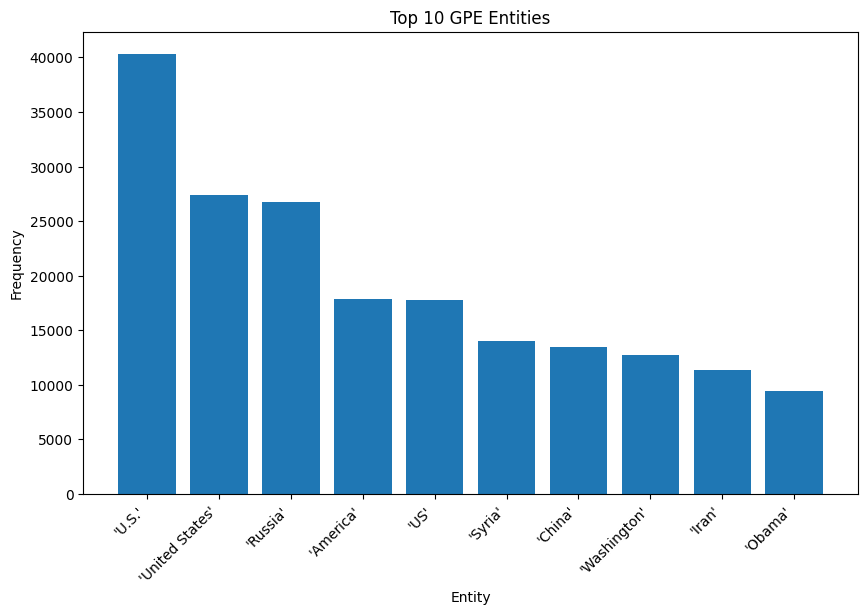

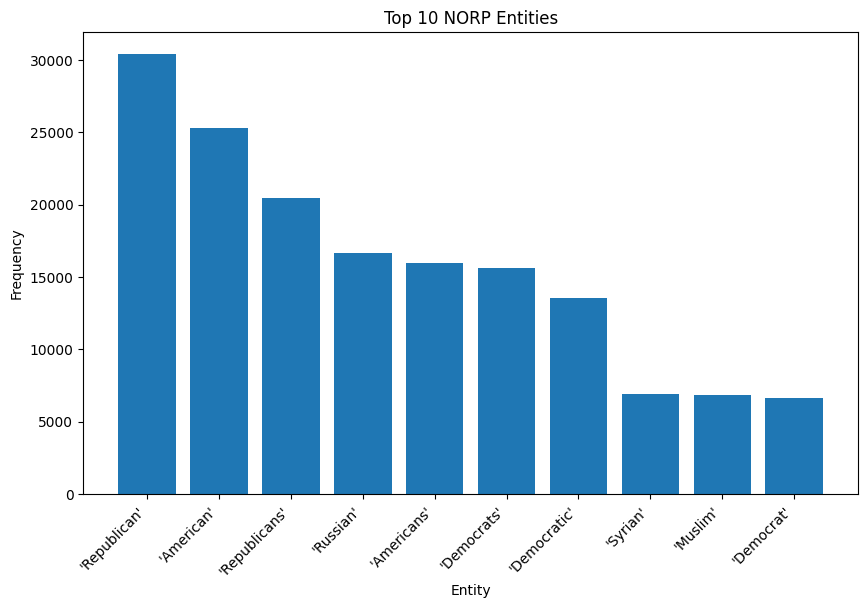

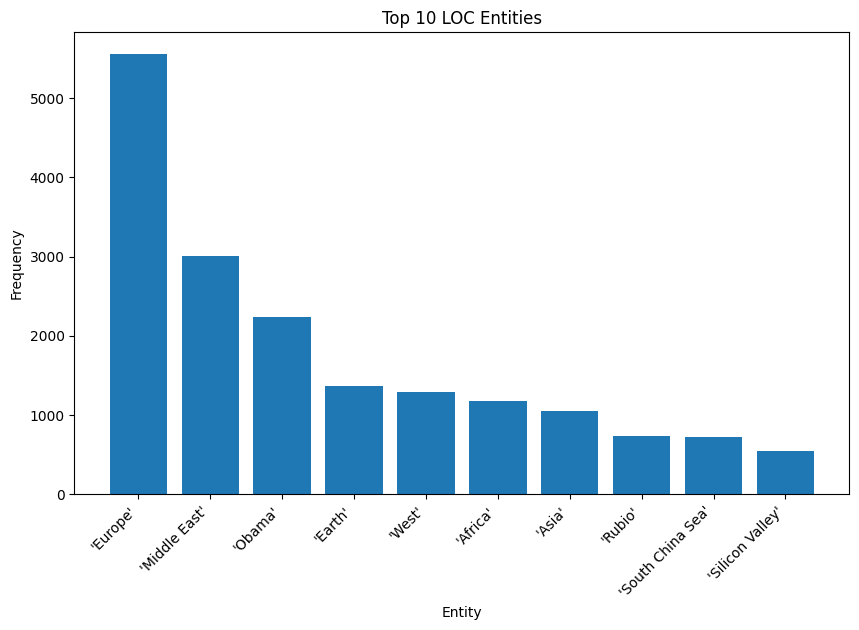

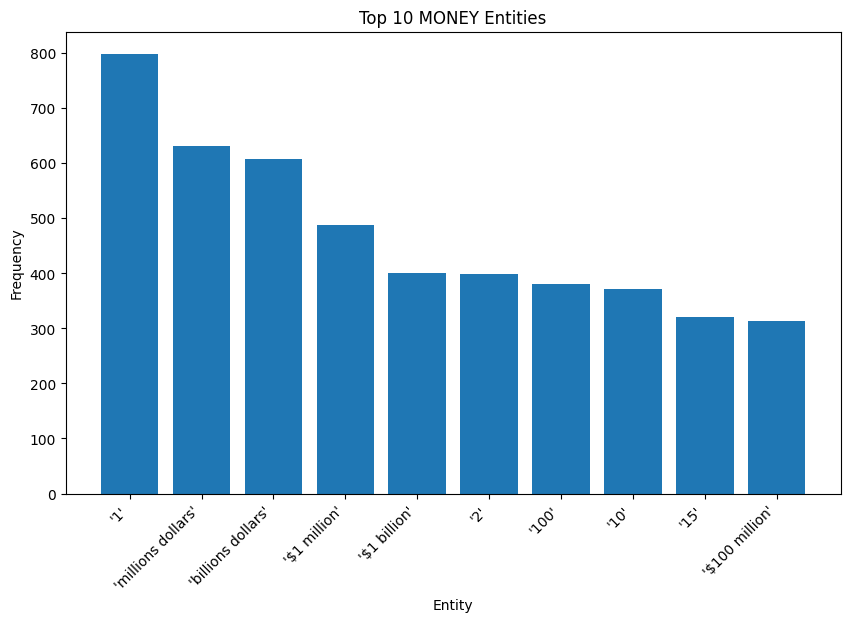

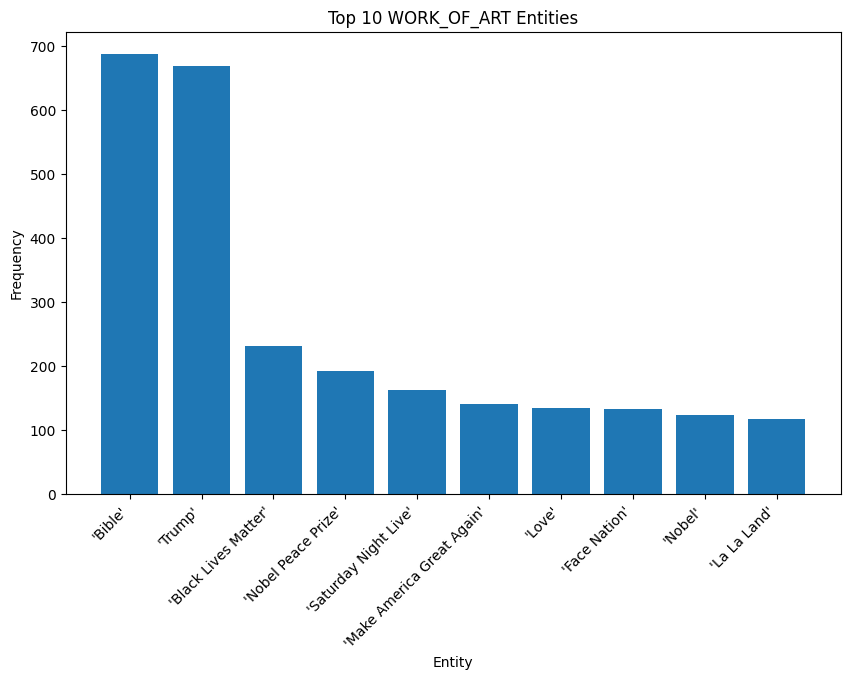

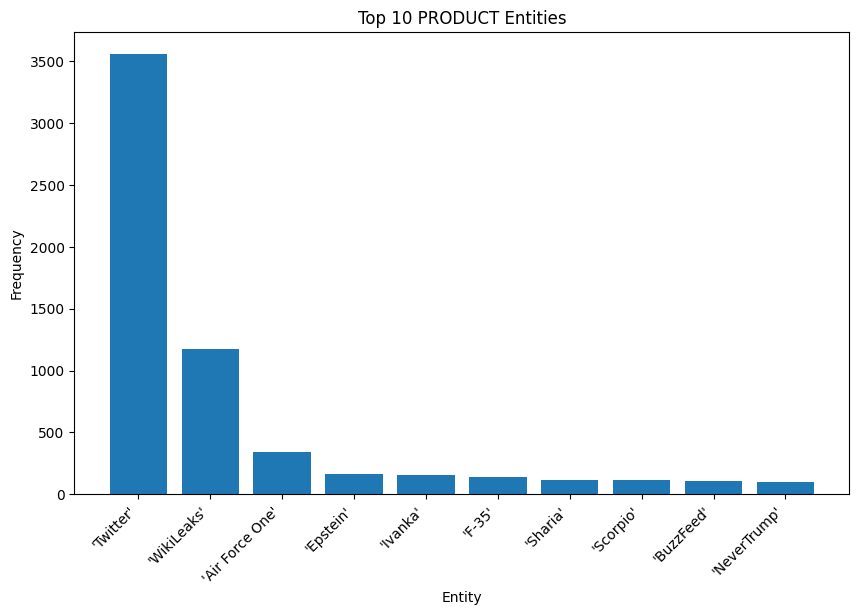

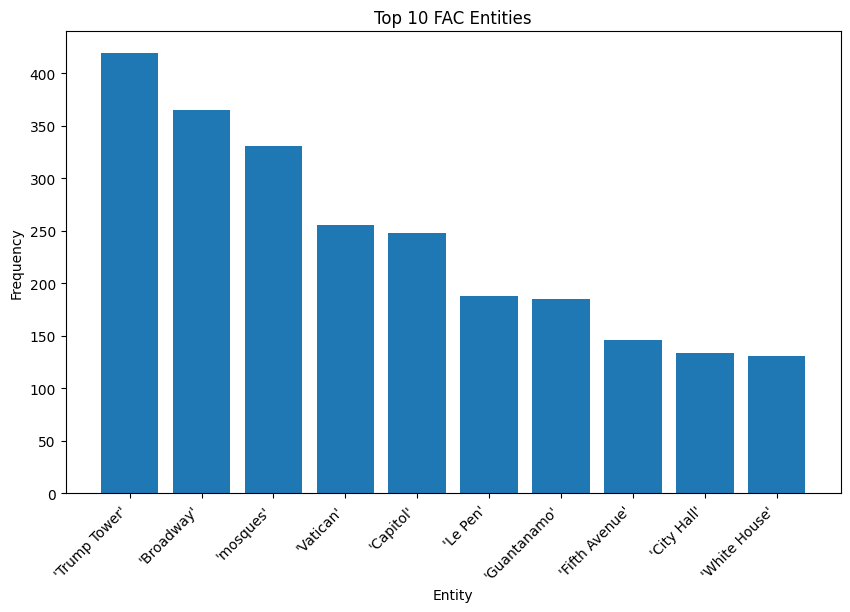

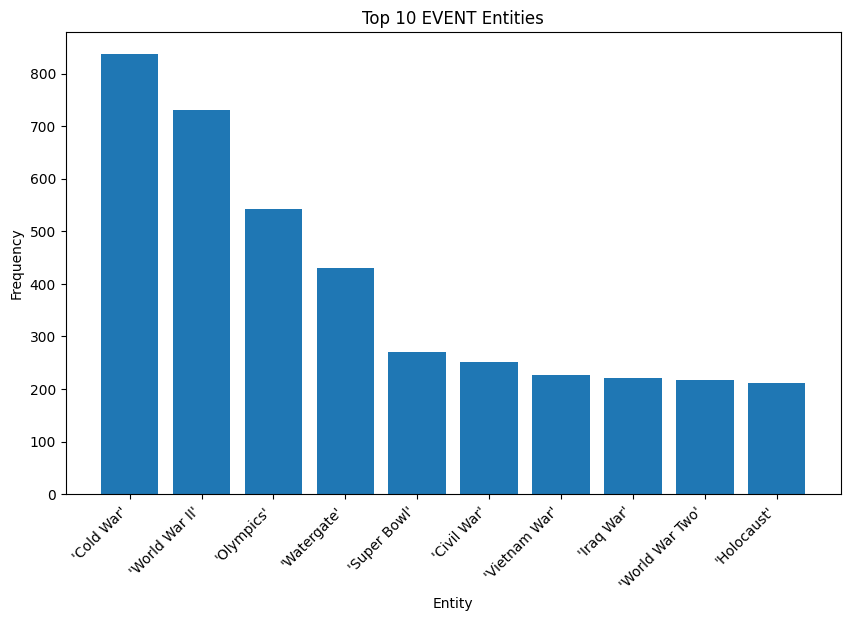

In [29]:

# plot the top 10 entities for each category as bar plots
for category, entities in top_entities.items():
    plt.figure(figsize=(10,6))
    plt.bar(entities.index, entities.values)
    plt.title(f'Top 10 {category} Entities')
    plt.xlabel('Entity')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [6]:
!pip install tqdm
from tqdm import tqdm
# create a dictionary to store the counts for each category and label combination
counts = {}
categories= ['PERSON', 'ORG','GPE', 'NORP', 'LOC','MONEY','WORK_OF_ART','PRODUCT','FAC', 'EVENT']
for category in categories:
    counts[category] = {'0': 0, '1': 0}

# loop through each sample in the dataframe and count the number of occurrences of each category in each label
top_entities ={}

for i in tqdm(range(len(df))):
    label = str(df.loc[i, 'label'])
    string=(df['entities'][i].strip()[1:-1]).split("), (")
    for entity in string:
      
            # print(entity)
            if entity.split(",")!=[''] :
                 final = entity.split(",")[1]
                 if len(final)>3:
                    try:
                      category = final.split("'")[1]
                      counts[category][label] += 1
                      # print(category)
                    except Exception as e:
                      pass
                    finally:
                      continue

# # create a stacked bar chart to visualize the results
# labels = ['0', '1']
# bottom = [0, 0]
# plt.figure(figsize=(12, 6))
# for category in categories:
#     values = [counts[category][label] for label in labels]
#     plt.bar(labels, values, bottom=bottom, label=category)
#     bottom = [sum(x) for x in zip(bottom, values)]
# plt.title('Entity Categories by Label')
# plt.xlabel('Label')
# plt.ylabel('Count')
# plt.legend()
# plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


100%|██████████| 78588/78588 [00:08<00:00, 9627.00it/s] 


In [7]:
print(counts)

{'PERSON': {'0': 457760, '1': 444739}, 'ORG': {'0': 362964, '1': 389855}, 'GPE': {'0': 317681, '1': 251115}, 'NORP': {'0': 179870, '1': 156228}, 'LOC': {'0': 21461, '1': 22519}, 'MONEY': {'0': 21422, '1': 15577}, 'WORK_OF_ART': {'0': 13327, '1': 10455}, 'PRODUCT': {'0': 7202, '1': 11971}, 'FAC': {'0': 7042, '1': 6867}, 'EVENT': {'0': 5744, '1': 7006}}


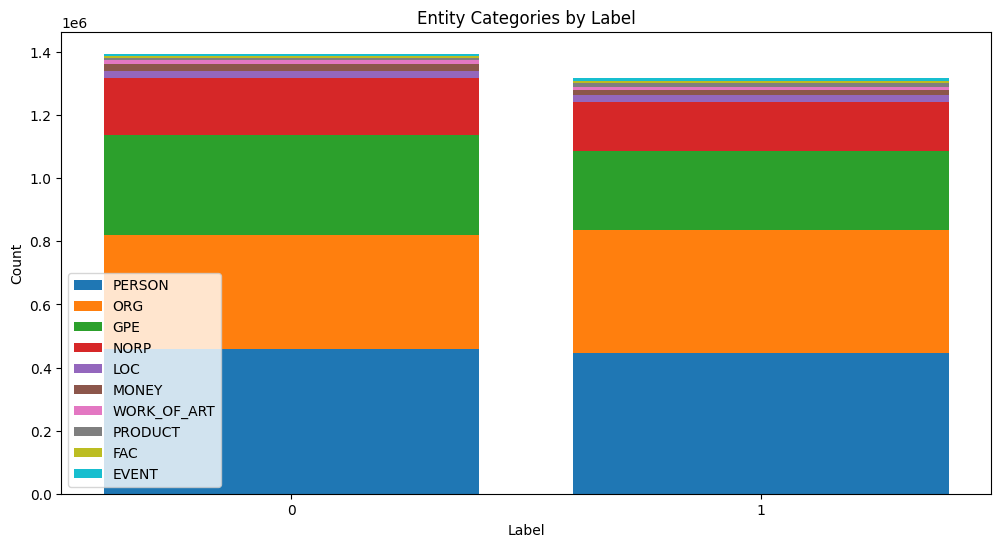

In [8]:
# create a stacked bar chart to visualize the results
labels = ['0', '1']
bottom = [0, 0]
plt.figure(figsize=(12, 6))
for category in categories:
    values = [counts[category][label] for label in labels]
    plt.bar(labels, values, bottom=bottom, label=category)
    bottom = [sum(x) for x in zip(bottom, values)]
plt.title('Entity Categories by Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.legend()
plt.show()